In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [45]:
data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [46]:
print(x_train.shape)
print(x_test.shape)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)
print('numero totale di proprietà %d' % x_train.shape[1])

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
numero totale di proprietà 784


Il numero è un 5


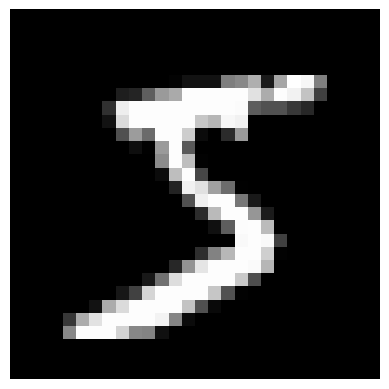

In [47]:
plt.imshow(x_train[0].reshape([28,28]), cmap='gray')
plt.axis('off')             #per rimuovere i numeri dagli assi
print('Il numero è un %d' %y_train[0])

Eseguiamo la normalizzazione per avere i pixel in un range tra 0 e 1 e non tra 0 e 255 (nero-bianco)

In [48]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print('valore massimo %d' % x_train.max())
print('valore minimo %d' % x_train.min())

valore massimo 1
valore minimo 0


L'output è espresso come un numero che va da 0 a 9, che corrisponde all'immagine mostrata. La nostra rete dovrà avere 10 nodi di output, quindi dobbiamo creare 10 output differenti utilizzando delle dummy variables.

In [49]:
from keras.utils import to_categorical

num_classes = 10
y_train_dummies = to_categorical(y_train, num_classes)
y_test_dummies = to_categorical(y_test, num_classes)
print(y_test_dummies[0])           #in questo modo non c'è solo un valore ma 10 valori dopo 9 sonon variabili di comodo
print(y_train[0])
print(x_train.shape[1])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
5
784


Creiamo il modello

In [50]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train.shape[1])) #avrò 784 input corrispondenti alla seconda colonna del train set, 512 nodi
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))      #numero di nodi pari al numero di classi
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Addestramento

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])  #classificazione multiclasse
model.fit(x_train, y_train_dummies, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7532 - loss: 0.9621
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9269 - loss: 0.2601
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9429 - loss: 0.1995
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9547 - loss: 0.1556
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9625 - loss: 0.1316
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9672 - loss: 0.1095
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9724 - loss: 0.0982
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9764 - loss: 0.0843
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9802 - loss: 0.0735
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9817 - loss: 0.0660
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9840 - loss: 0.0560
Epoch 12/20
1875/1875 ━━━━━━━━

valutiamo il modello per il set test

In [52]:
model.evaluate(x_test, y_test_dummies)          #performance migliori rispetto a modelli di machine learning

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9737 - loss: 0.0915


[0.0763254314661026, 0.9779000282287598]

Guardiamo gli esempi che la rete ha sbagliato a classificare

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
Numero 4 classificato come 9


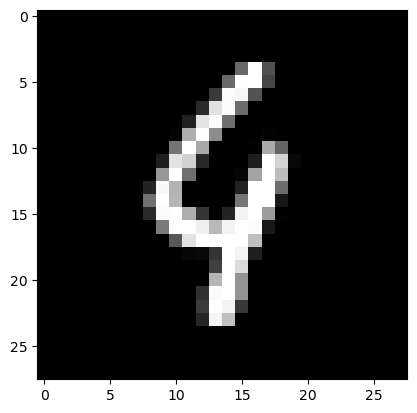

Numero 2 classificato come 9


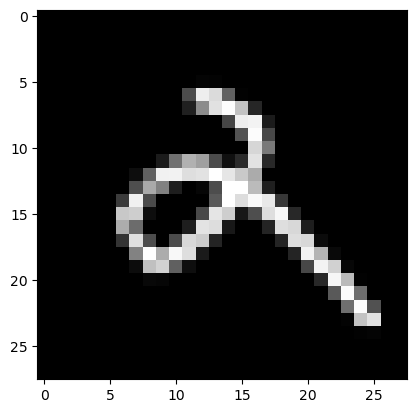

Numero 4 classificato come 2


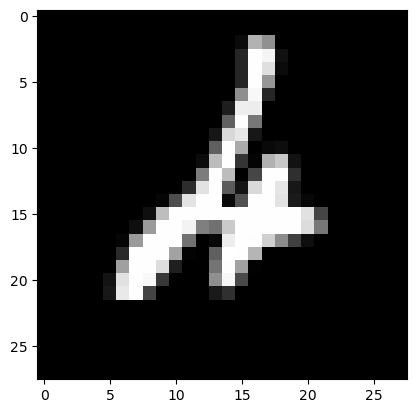

Numero 6 classificato come 0


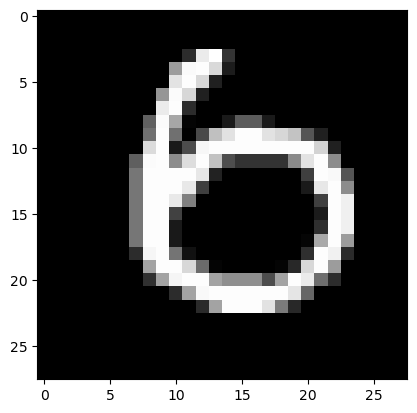

Numero 2 classificato come 7


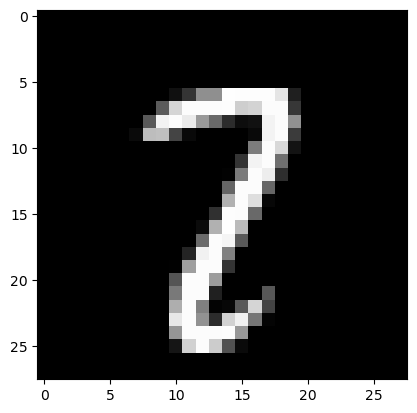

Numero 5 classificato come 3


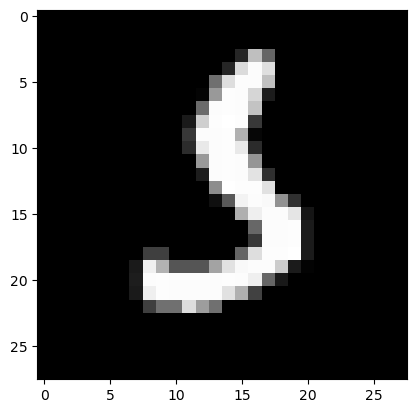

Numero 3 classificato come 7


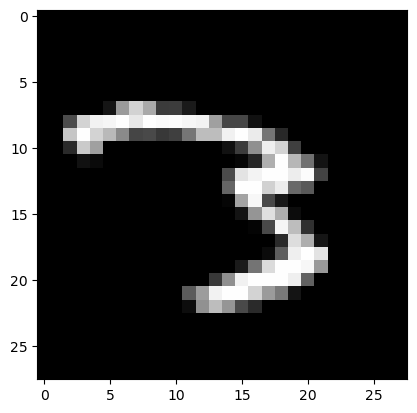

Numero 6 classificato come 0


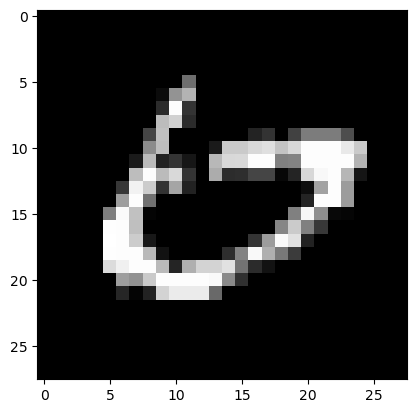

Numero 4 classificato come 9


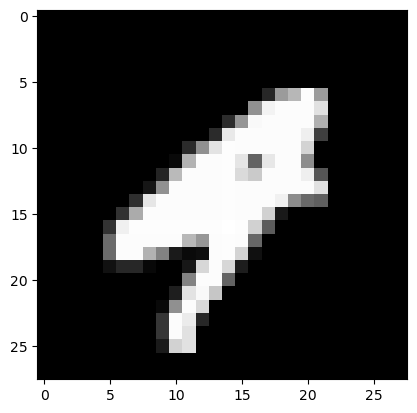

Numero 8 classificato come 2


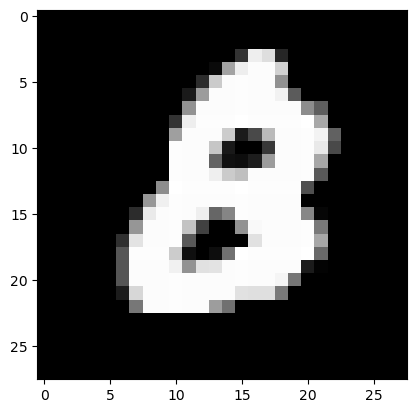

Numero 8 classificato come 2


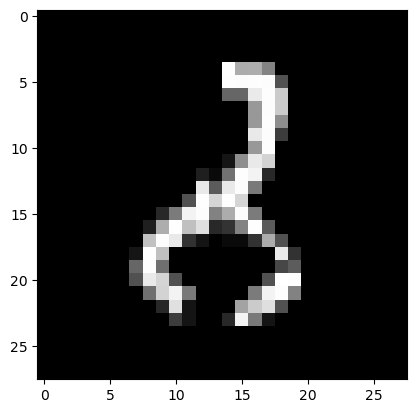

Numero 2 classificato come 1


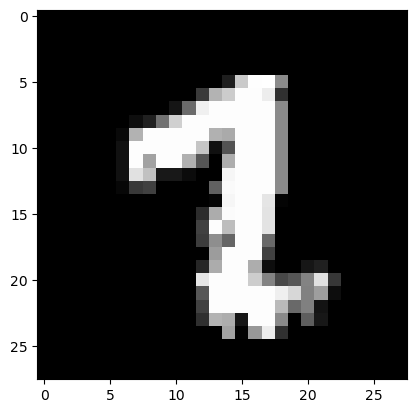

Numero 7 classificato come 3


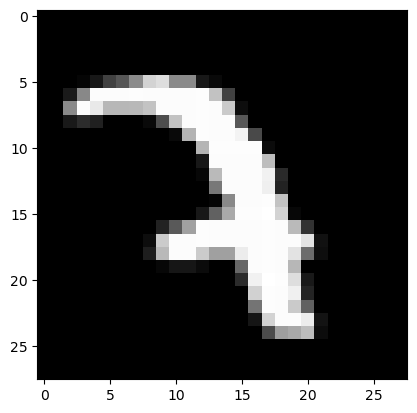

Numero 8 classificato come 4


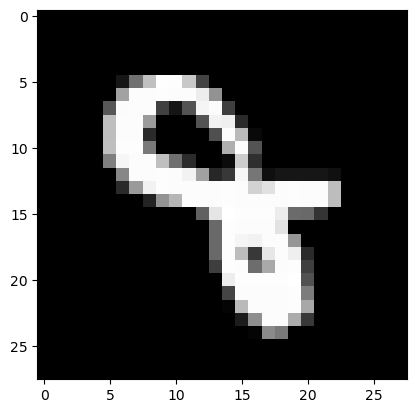

Numero 4 classificato come 9


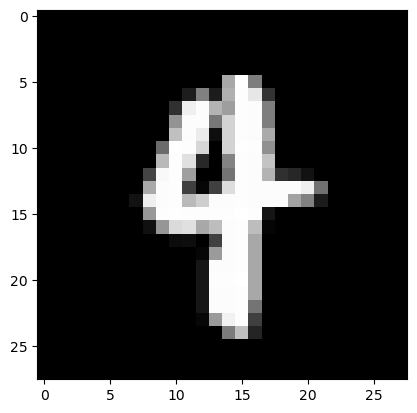

Numero 5 classificato come 8


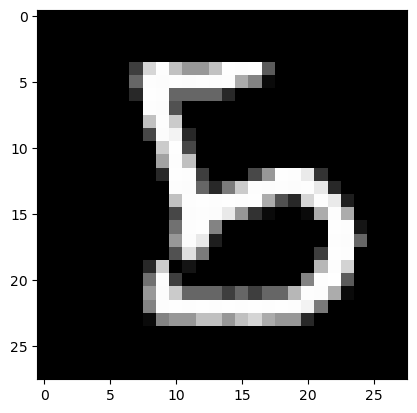

Numero 4 classificato come 9


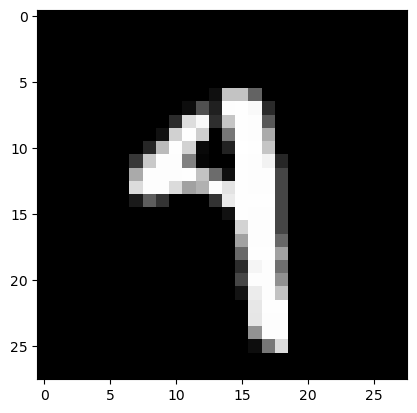

Numero 4 classificato come 9


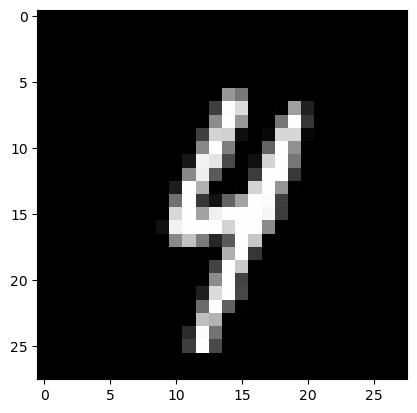

Numero 7 classificato come 9


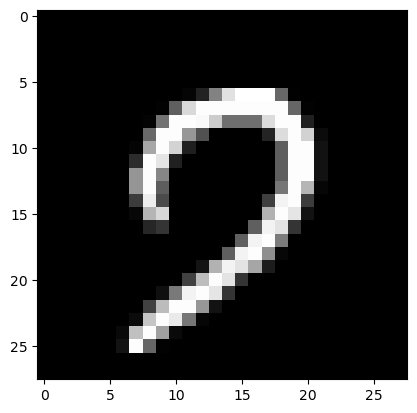

Numero 4 classificato come 9


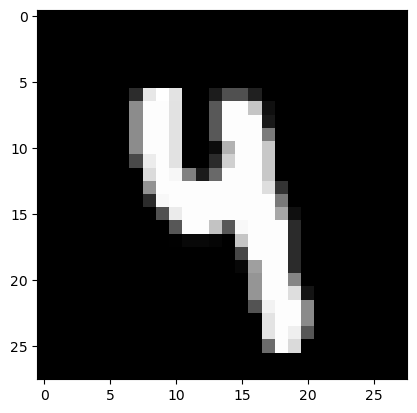

Numero 8 classificato come 9


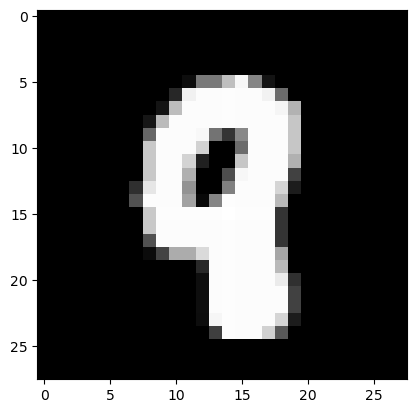

Numero 5 classificato come 4


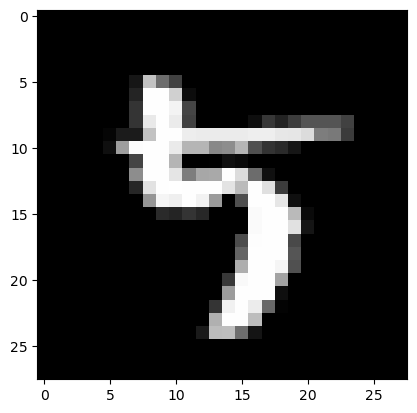

Numero 5 classificato come 3


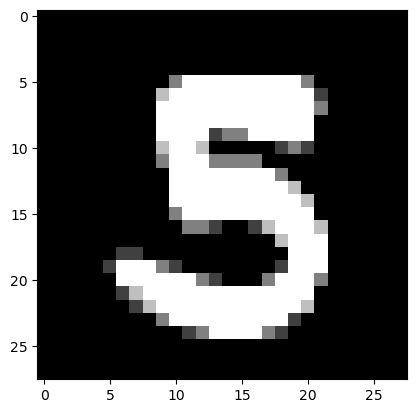

Numero 6 classificato come 5


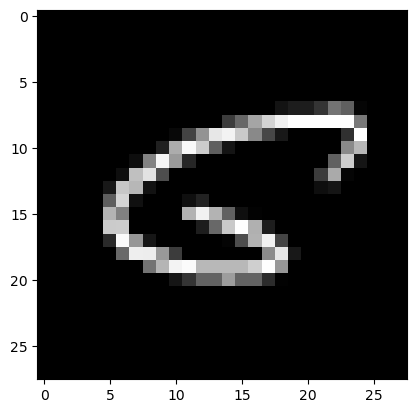

Numero 7 classificato come 2


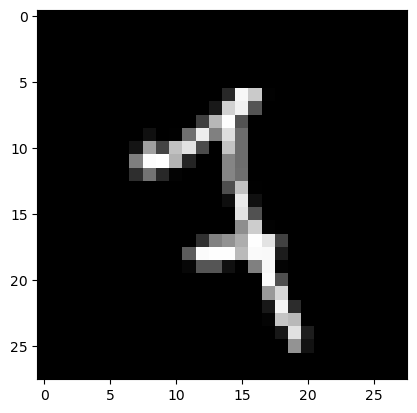

Numero 6 classificato come 8


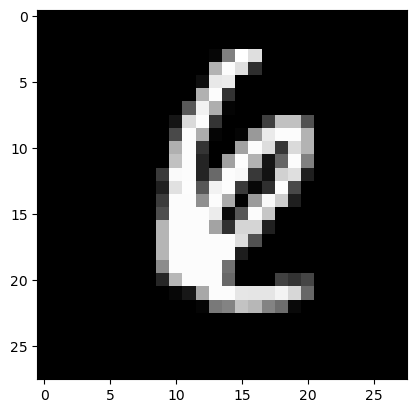

Numero 4 classificato come 6


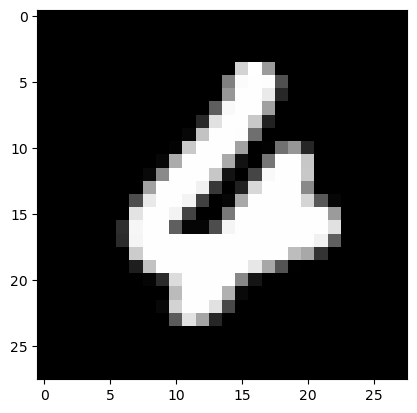

Numero 4 classificato come 0


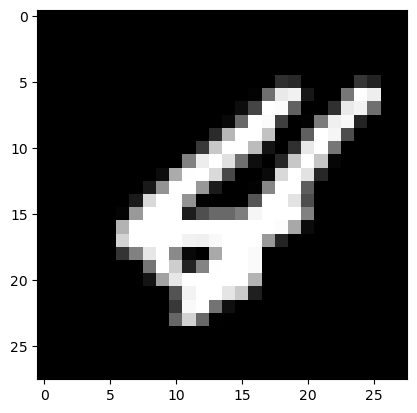

Numero 6 classificato come 1


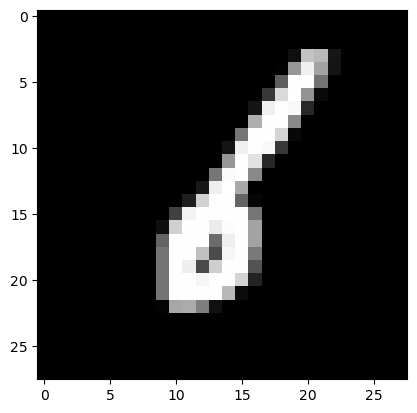

Numero 6 classificato come 8


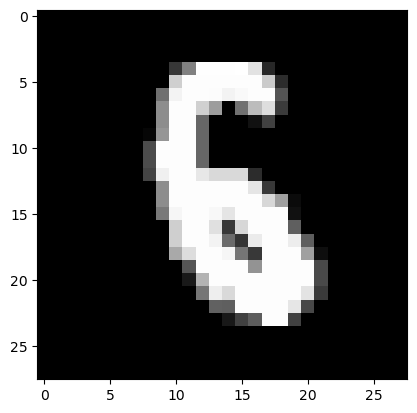

Numero 7 classificato come 9


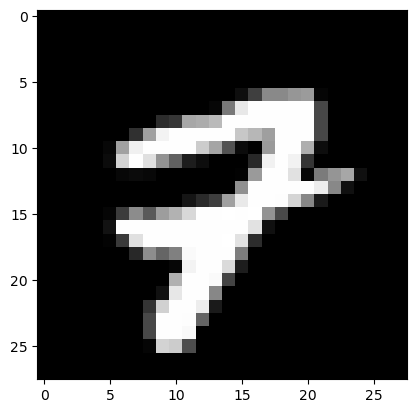

Numero 7 classificato come 2


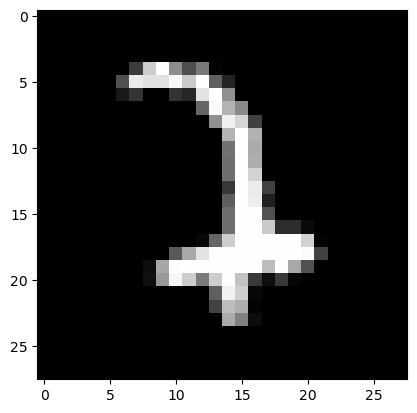

Numero 9 classificato come 4


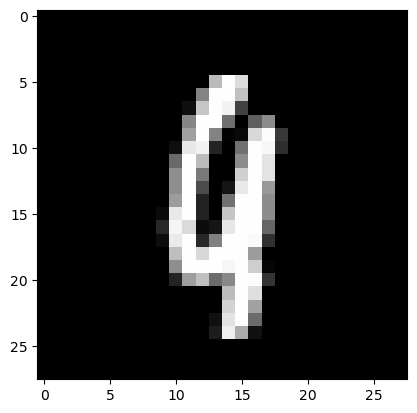

Numero 4 classificato come 9


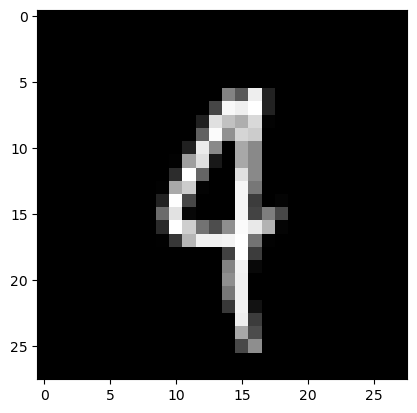

Numero 9 classificato come 3


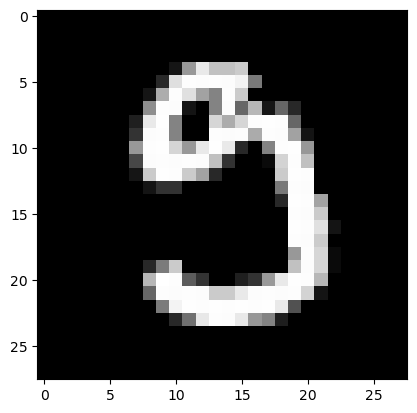

Numero 5 classificato come 9


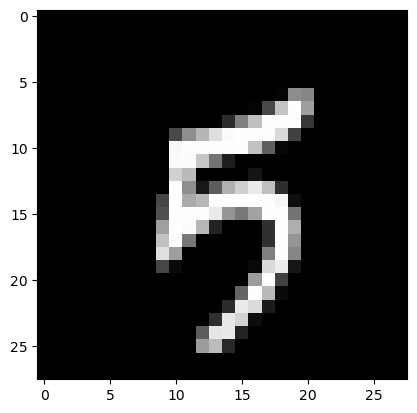

Numero 8 classificato come 3


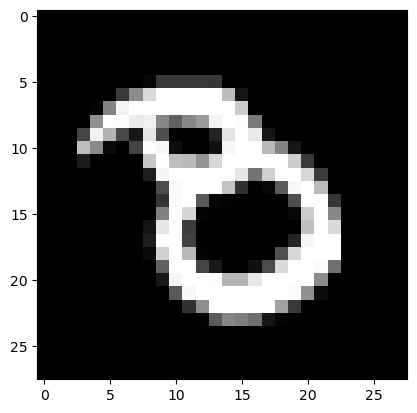

Numero 7 classificato come 9


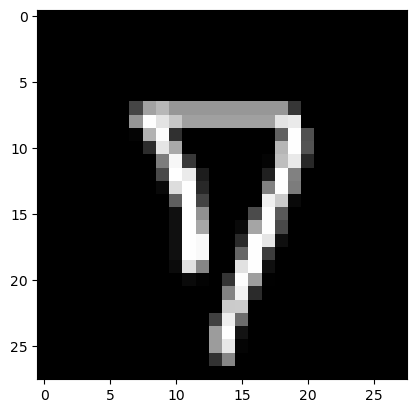

Numero 5 classificato come 3


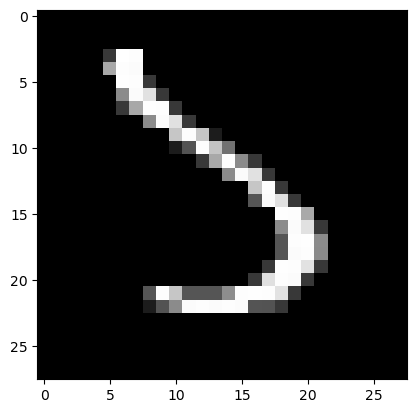

Numero 2 classificato come 3


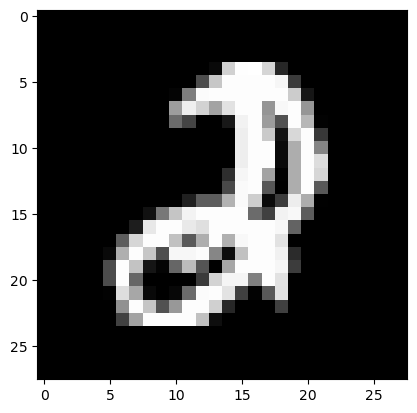

Numero 4 classificato come 9


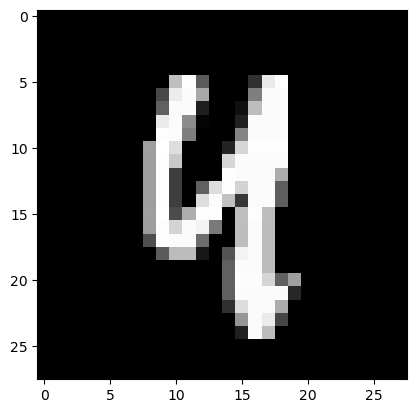

Numero 9 classificato come 7


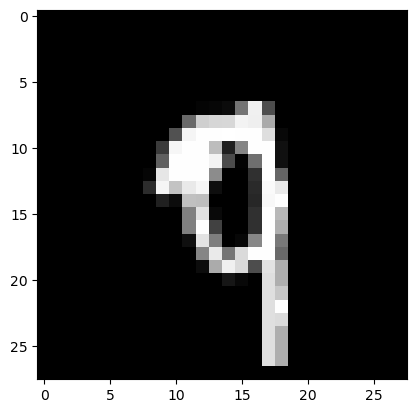

Numero 7 classificato come 1


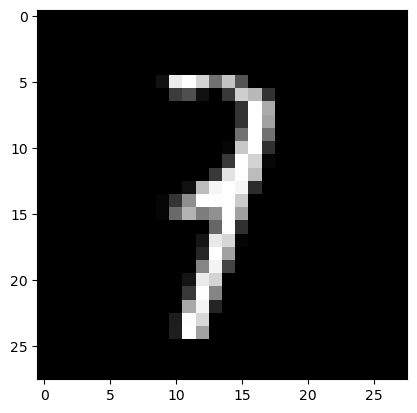

Numero 7 classificato come 9


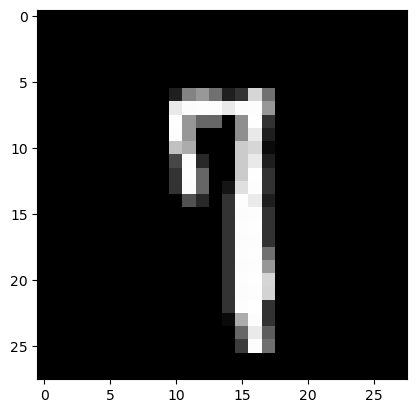

Numero 8 classificato come 7


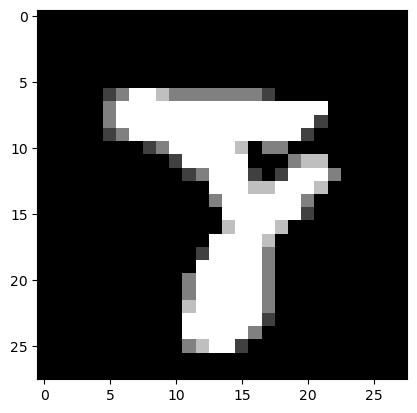

Numero 4 classificato come 2


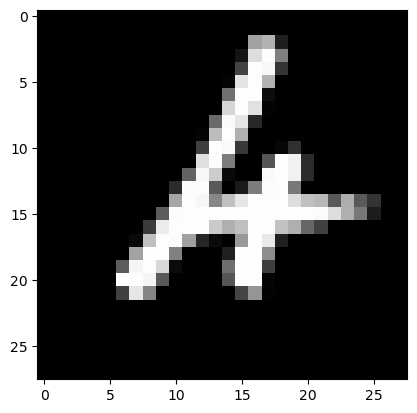

Numero 2 classificato come 3


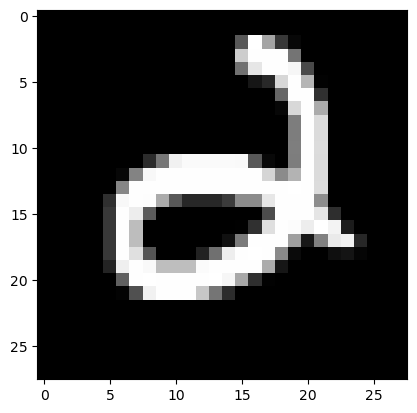

Numero 3 classificato come 7


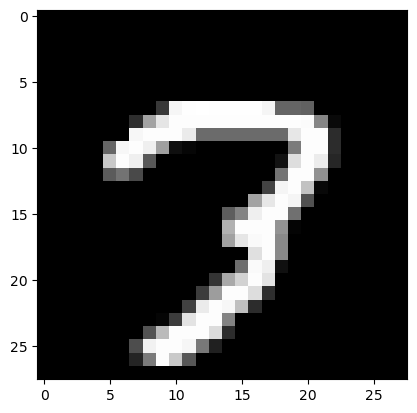

Numero 8 classificato come 0


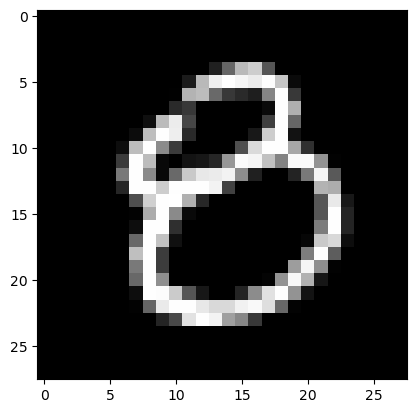

Numero 7 classificato come 2


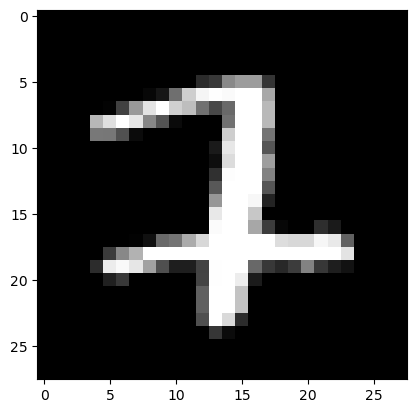

Numero 2 classificato come 8


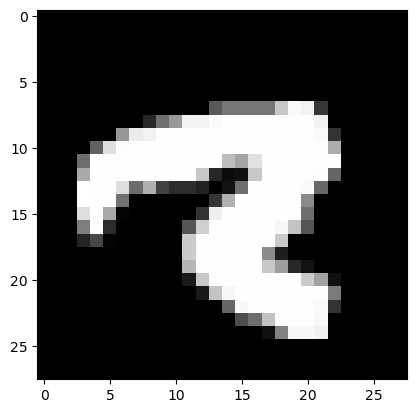

Numero 9 classificato come 4


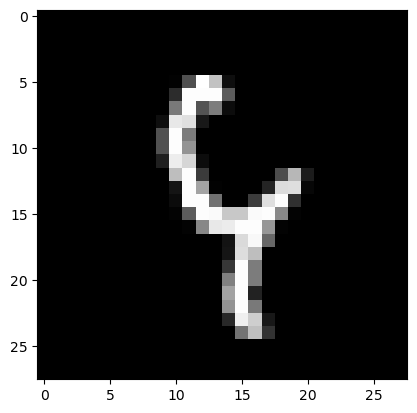

Numero 5 classificato come 6


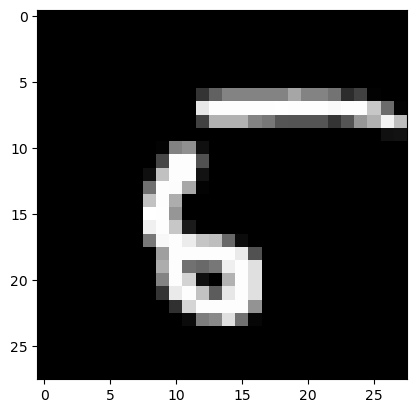

Numero 7 classificato come 9


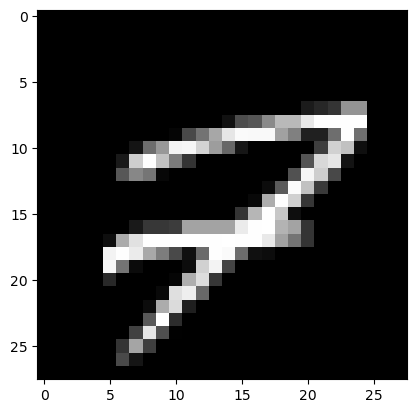

Numero 2 classificato come 0


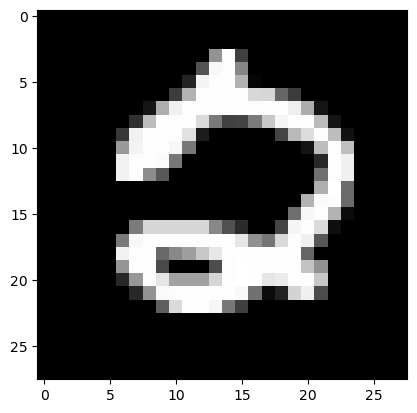

Numero 0 classificato come 9


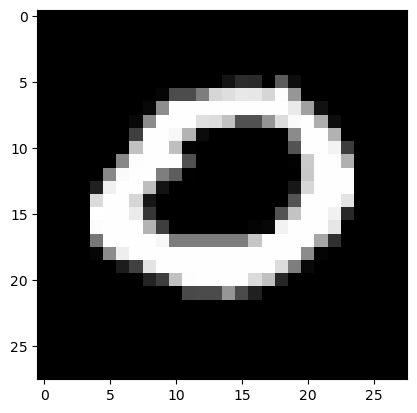

Numero 8 classificato come 3


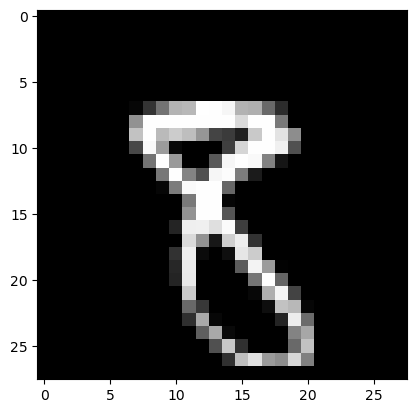

Numero 7 classificato come 9


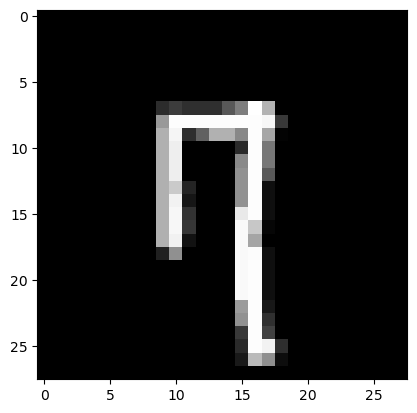

Numero 0 classificato come 4


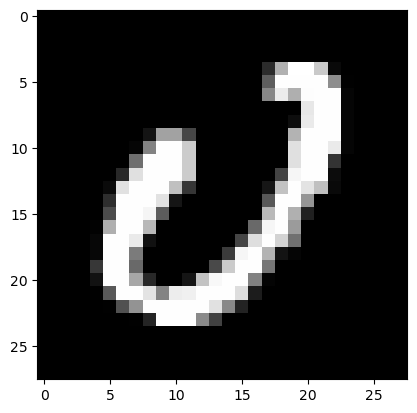

Numero 5 classificato come 3


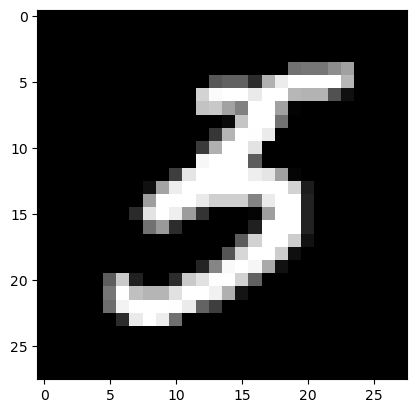

Numero 2 classificato come 7


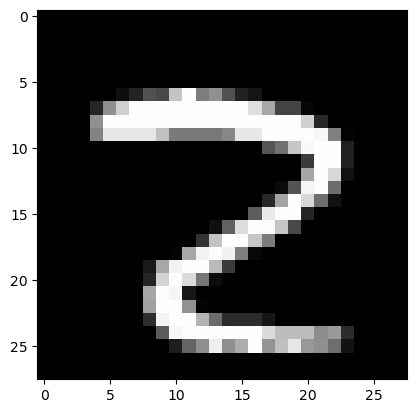

Numero 4 classificato come 9


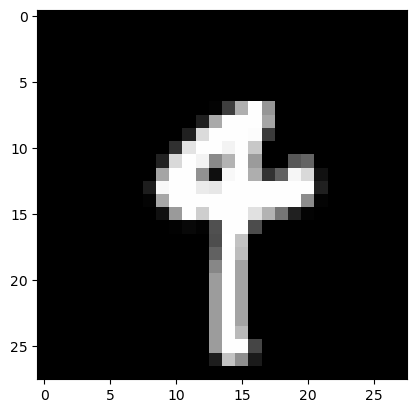

Numero 7 classificato come 9


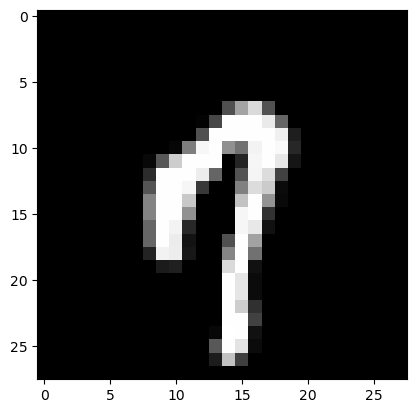

Numero 5 classificato come 0


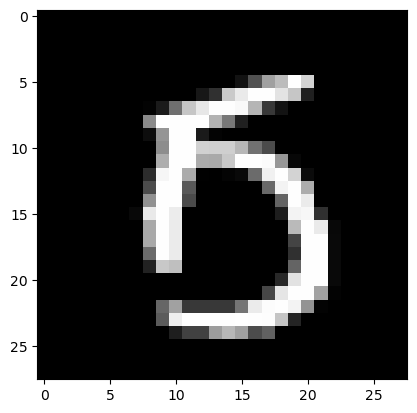

Numero 2 classificato come 0


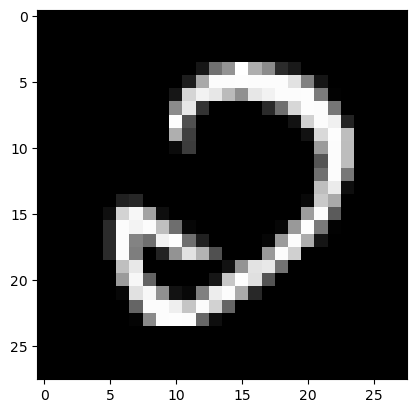

Numero 3 classificato come 2


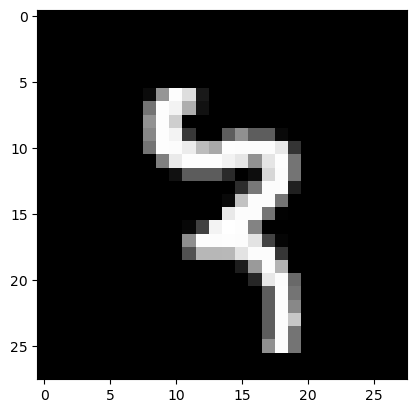

Numero 6 classificato come 4


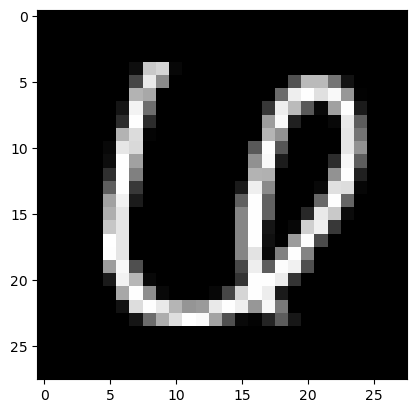

Numero 4 classificato come 9


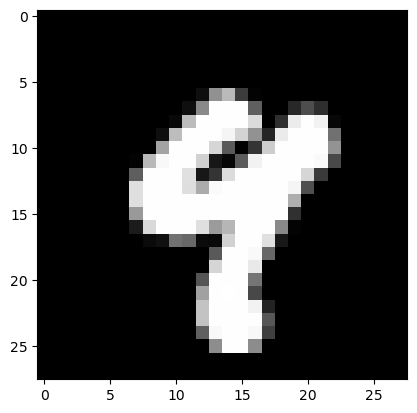

Numero 6 classificato come 1


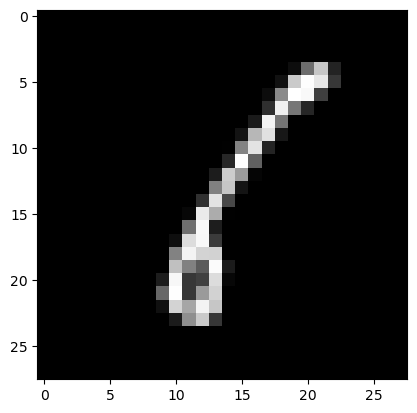

Numero 1 classificato come 2


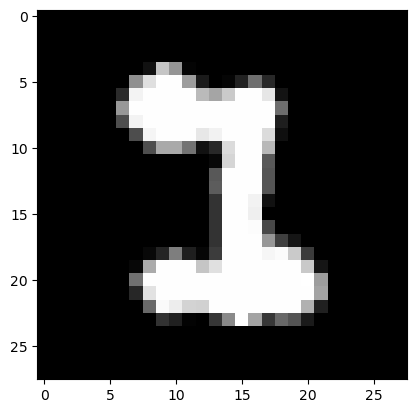

Numero 0 classificato come 5


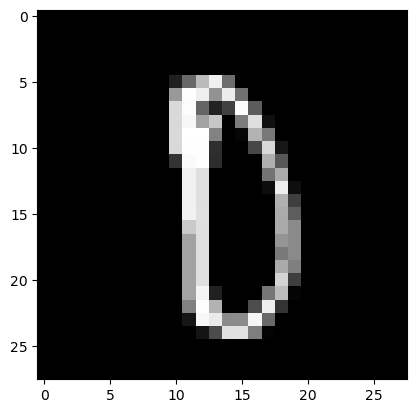

Numero 5 classificato come 8


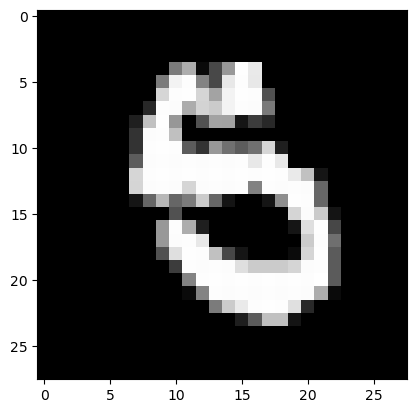

Numero 8 classificato come 0


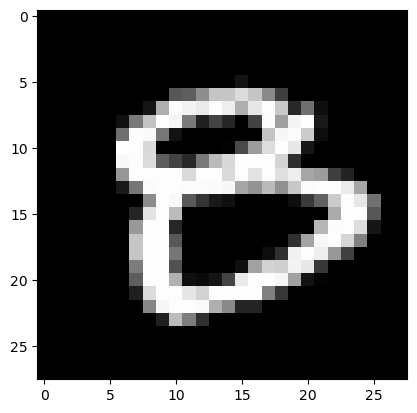

Numero 9 classificato come 0


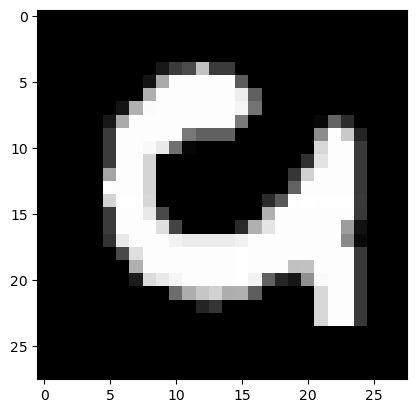

Numero 5 classificato come 9


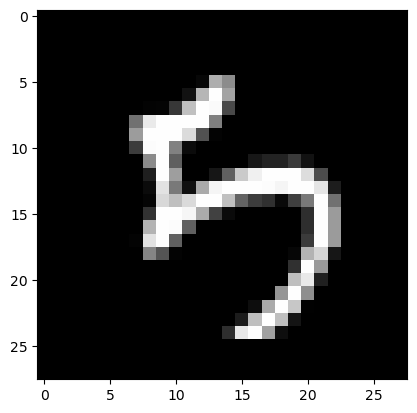

Numero 4 classificato come 9


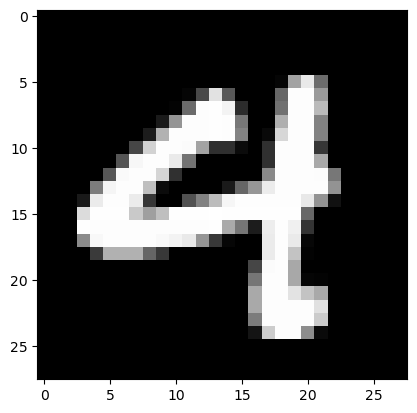

Numero 9 classificato come 1


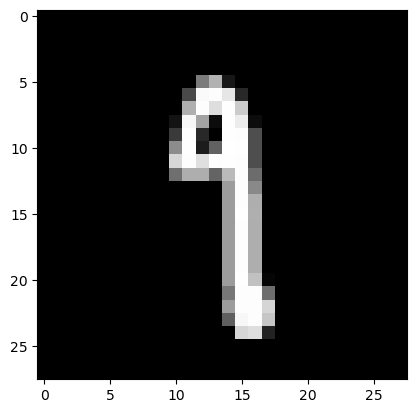

Numero 3 classificato come 9


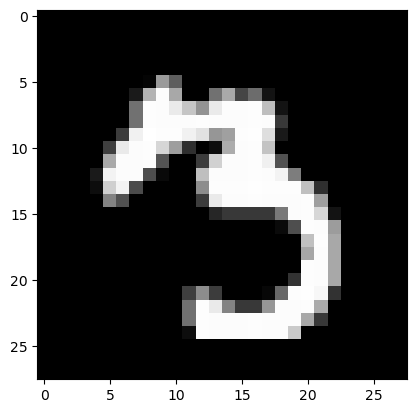

Numero 6 classificato come 4


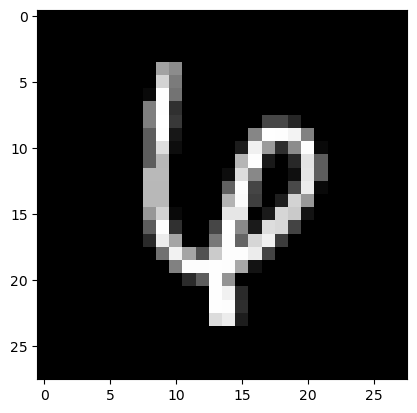

Numero 4 classificato come 9


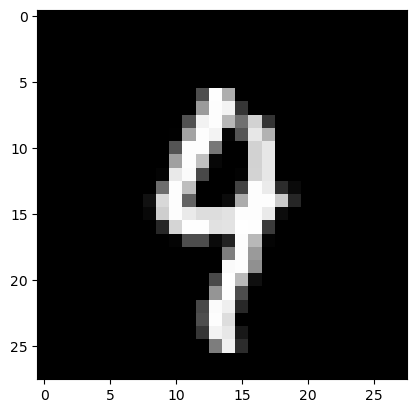

Numero 2 classificato come 4


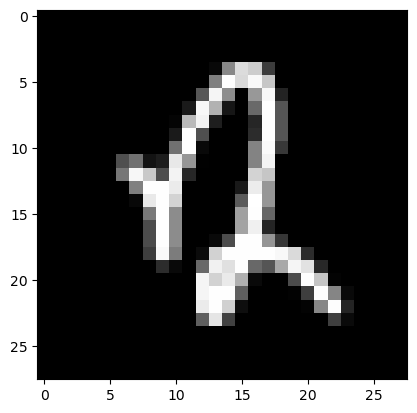

Numero 4 classificato come 9


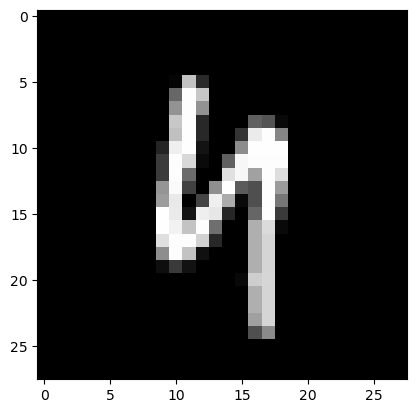

Numero 5 classificato come 3


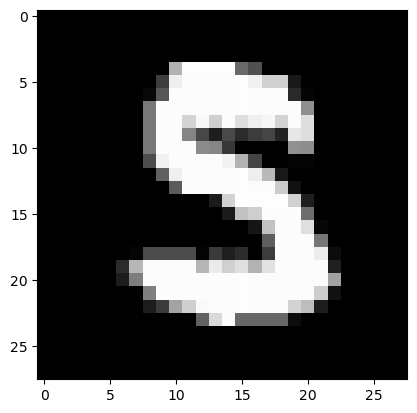

Numero 5 classificato come 3


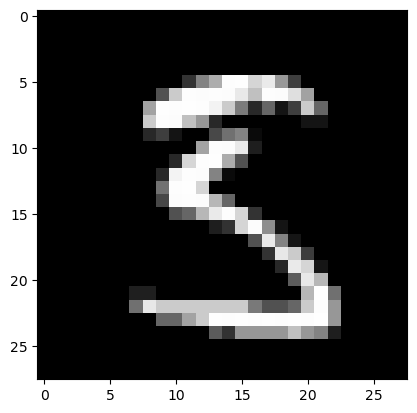

Numero 7 classificato come 1


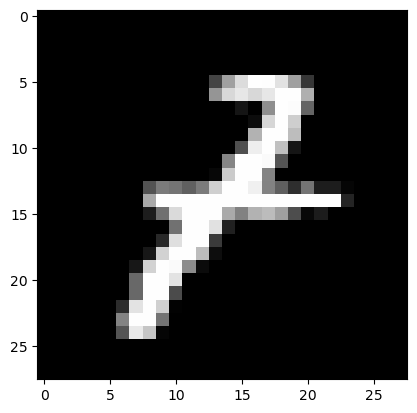

Numero 2 classificato come 8


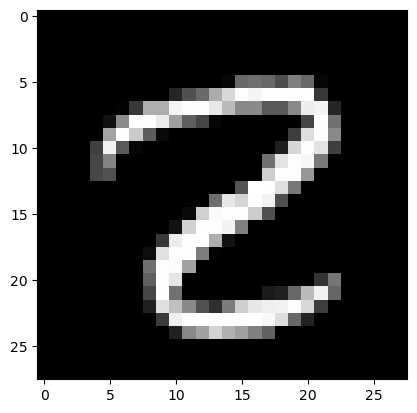

Numero 4 classificato come 9


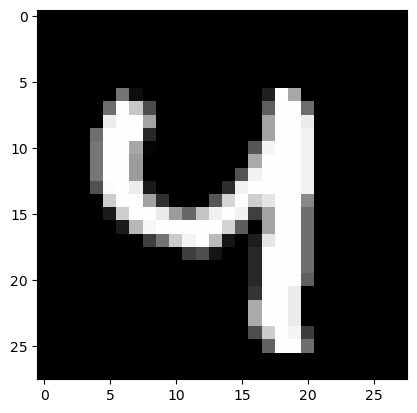

Numero 9 classificato come 0


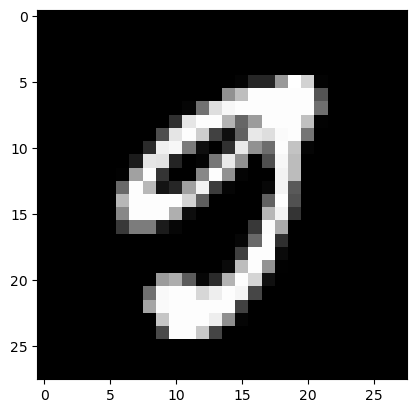

Numero 6 classificato come 1


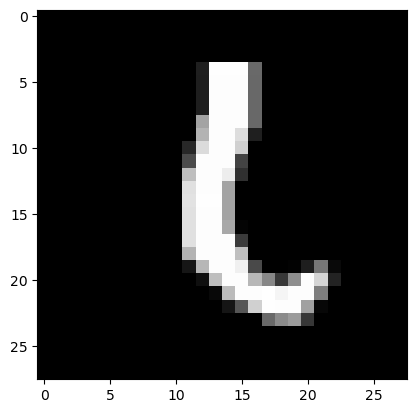

Numero 5 classificato come 8


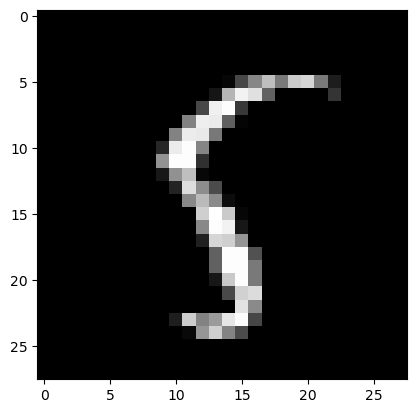

Numero 5 classificato come 3


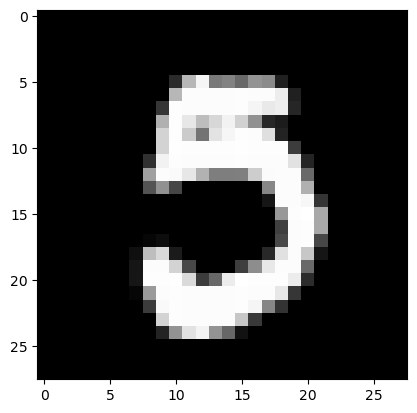

Numero 4 classificato come 7


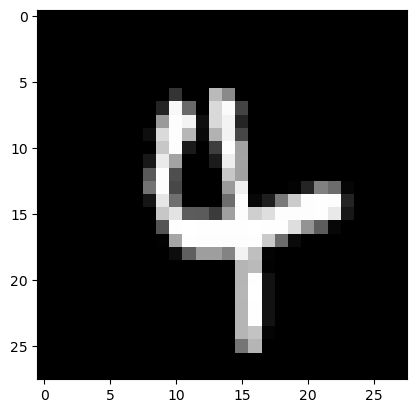

Numero 8 classificato come 0


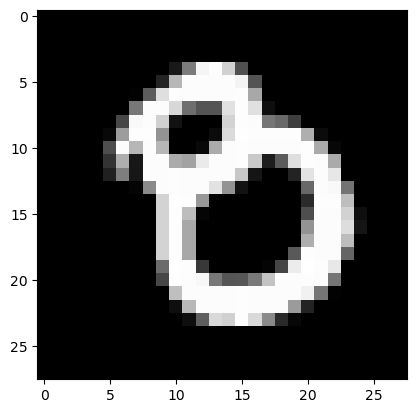

Numero 7 classificato come 3


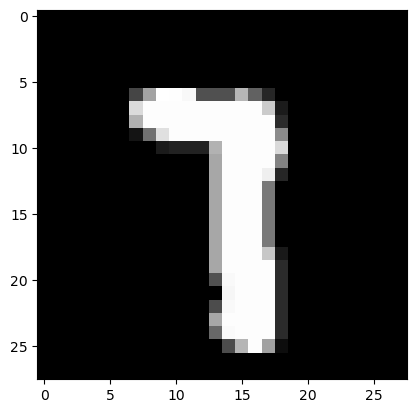

Numero 3 classificato come 2


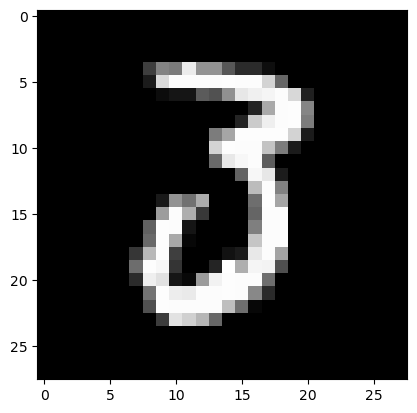

Numero 9 classificato come 7


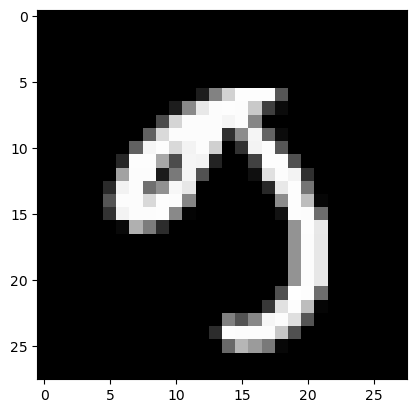

Numero 3 classificato come 5


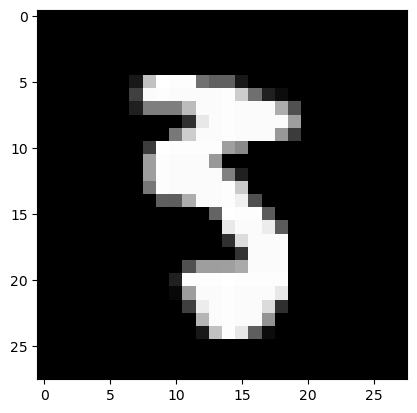

Numero 6 classificato come 2


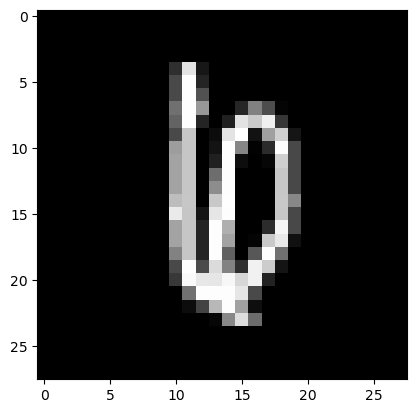

Numero 1 classificato come 2


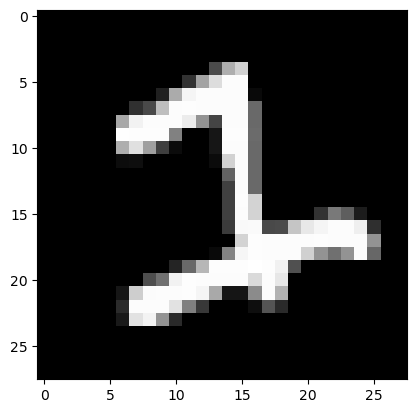

Numero 5 classificato come 9


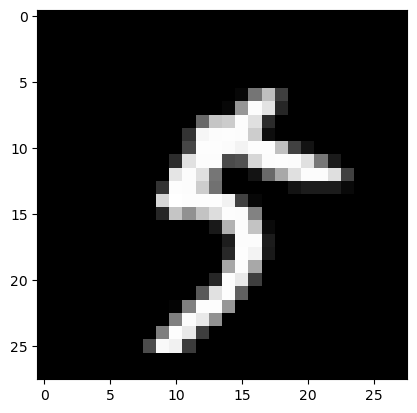

Numero 4 classificato come 9


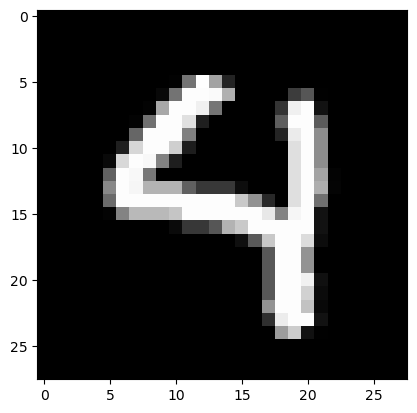

Numero 8 classificato come 9


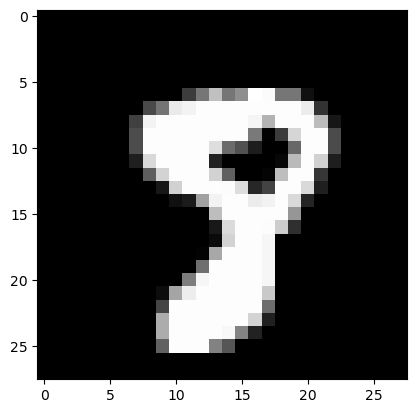

Numero 7 classificato come 9


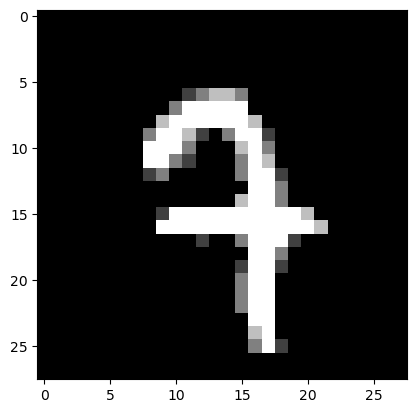

Numero 4 classificato come 9


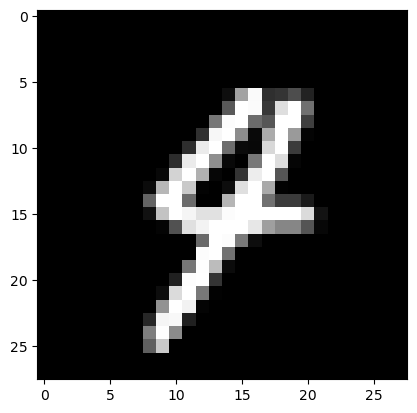

Numero 6 classificato come 0


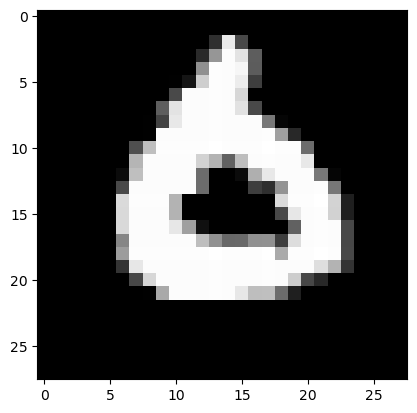

Numero 2 classificato come 1


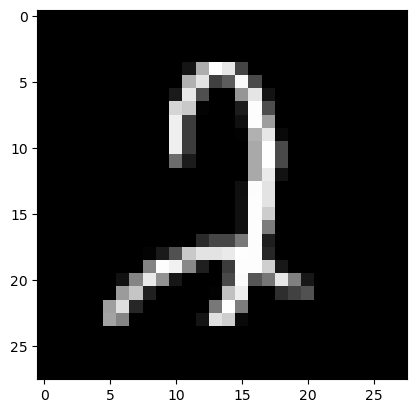

Numero 9 classificato come 1


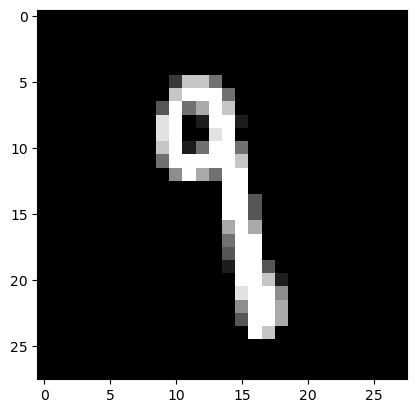

Numero 6 classificato come 4


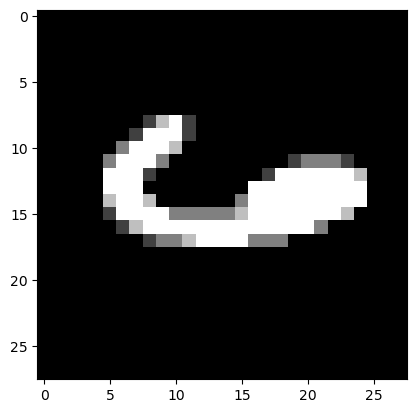

Numero 4 classificato come 9


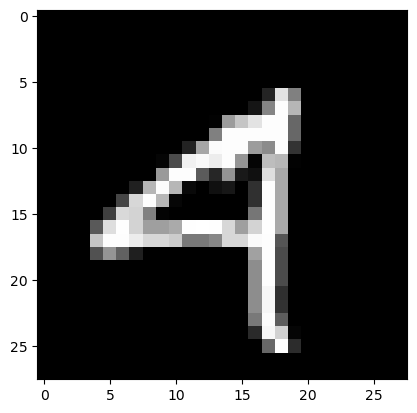

Numero 5 classificato come 0


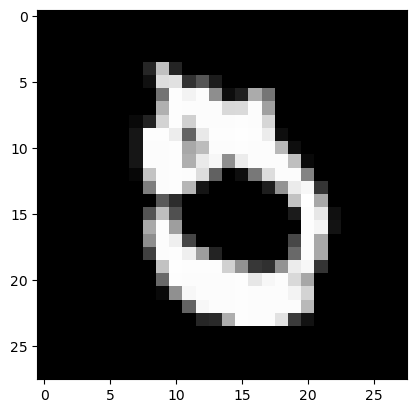

Numero 8 classificato come 5


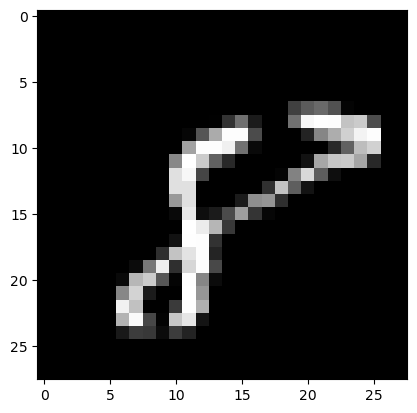

Numero 9 classificato come 3


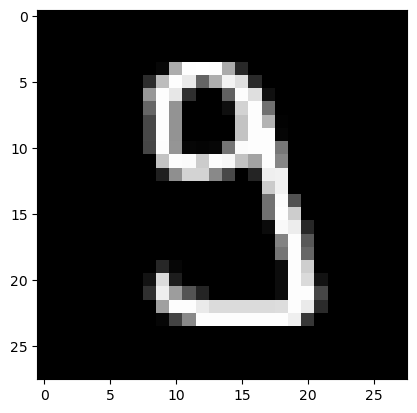

Numero 2 classificato come 3


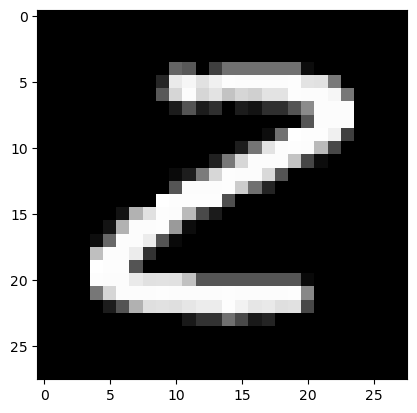

Numero 4 classificato come 9


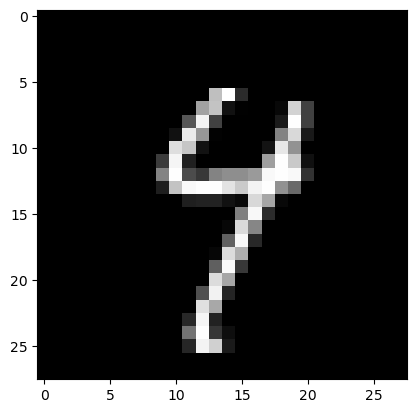

Numero 8 classificato come 3


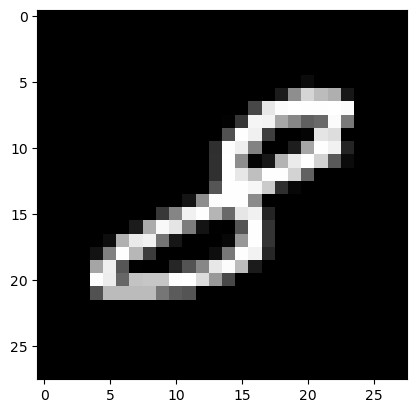

Numero 7 classificato come 2


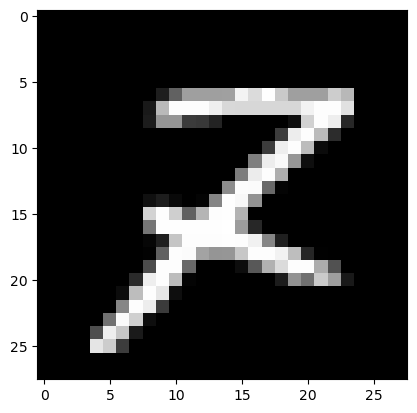

Numero 4 classificato come 2


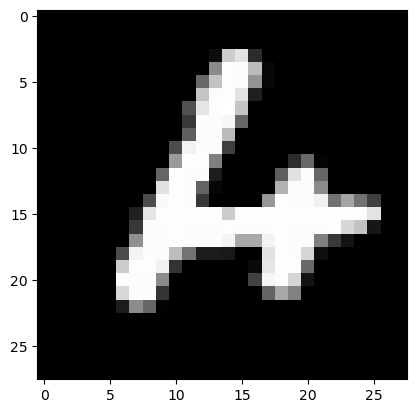

Numero 2 classificato come 8


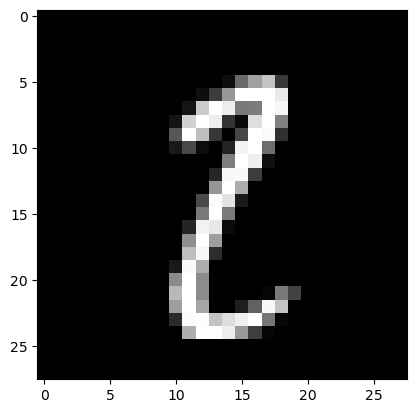

Numero 7 classificato come 8


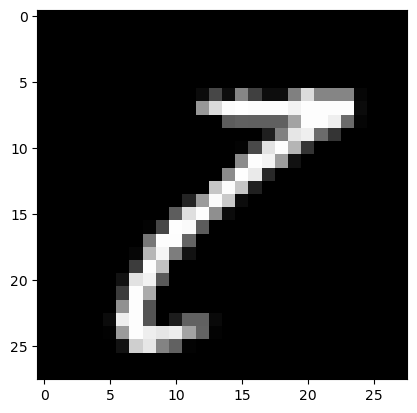

Numero 0 classificato come 6


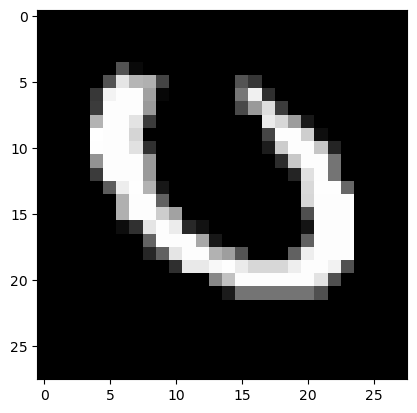

Numero 7 classificato come 1


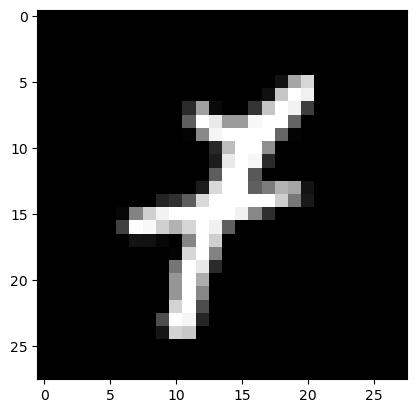

Numero 6 classificato come 2


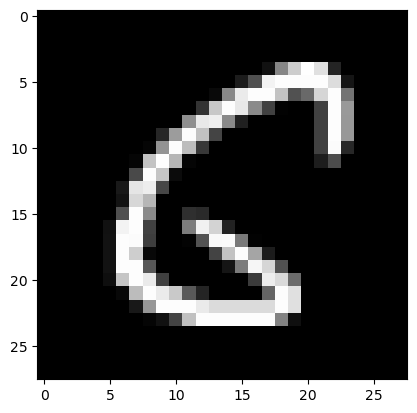

Numero 5 classificato come 3


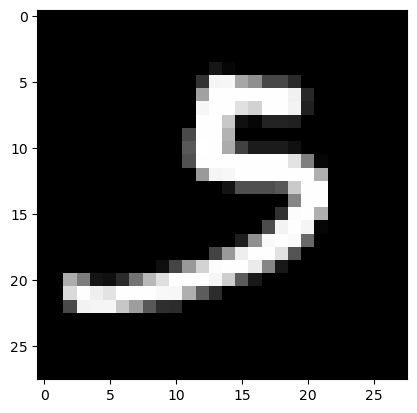

Numero 1 classificato come 3


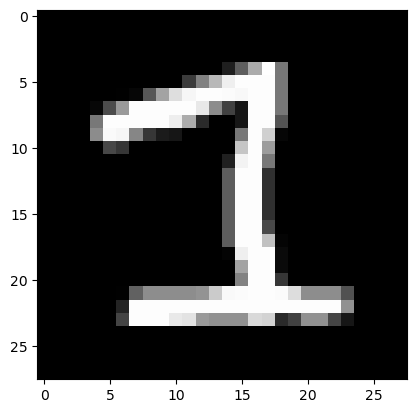

Numero 4 classificato come 2


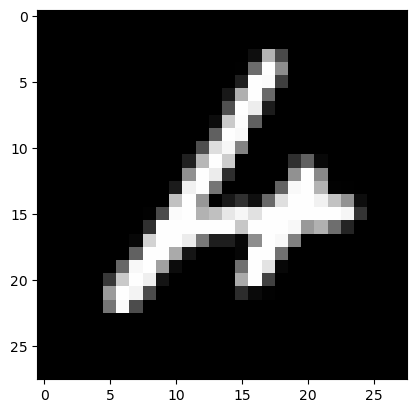

Numero 7 classificato come 1


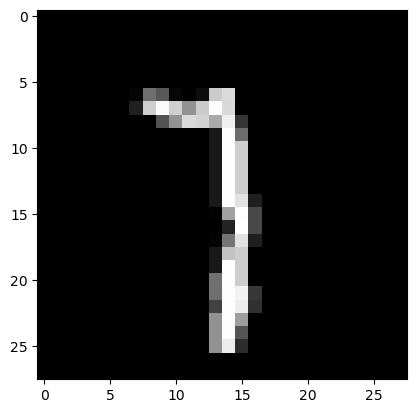

Numero 0 classificato come 2


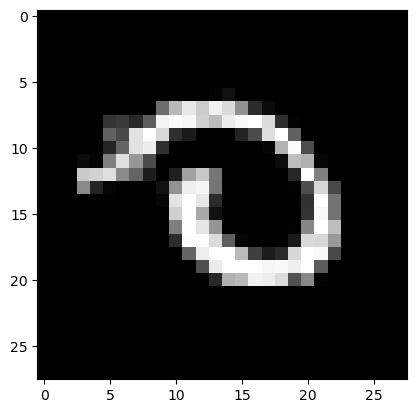

Numero 8 classificato come 3


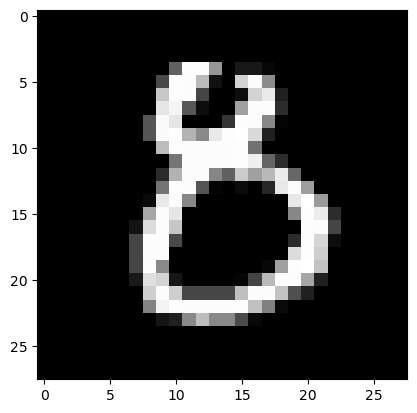

Numero 9 classificato come 3


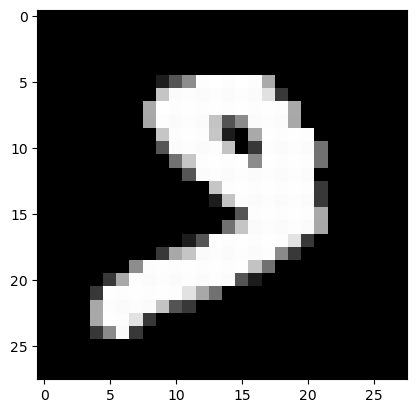

Numero 8 classificato come 1


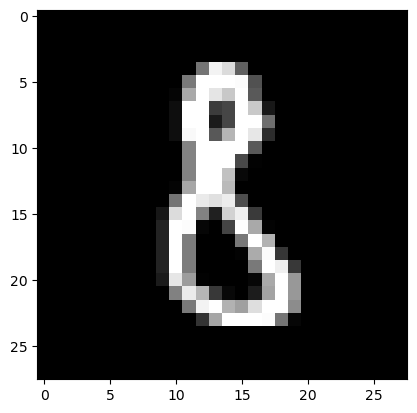

Numero 2 classificato come 7


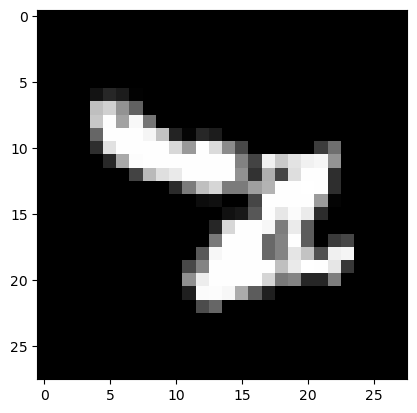

Numero 7 classificato come 9


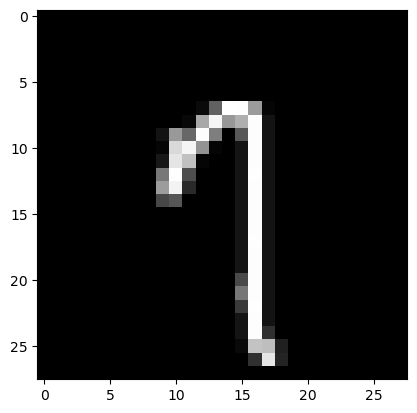

Numero 1 classificato come 7


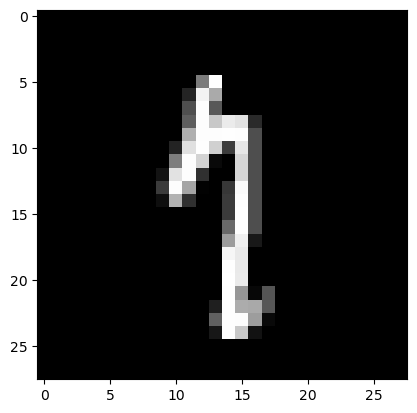

Numero 2 classificato come 8


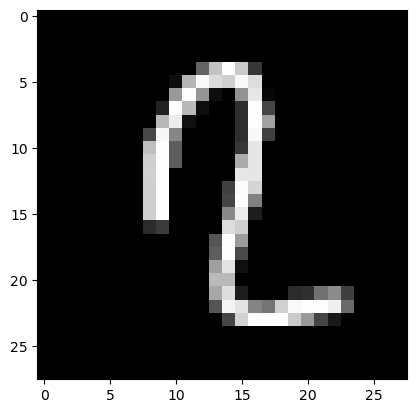

Numero 2 classificato come 7


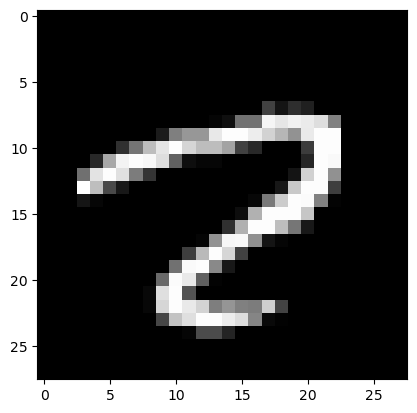

Numero 5 classificato come 9


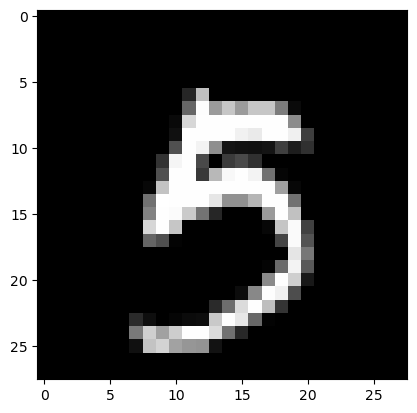

Numero 8 classificato come 7


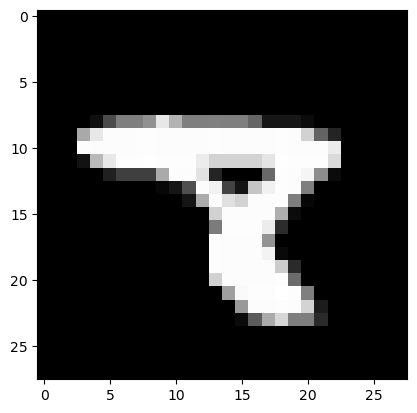

Numero 9 classificato come 3


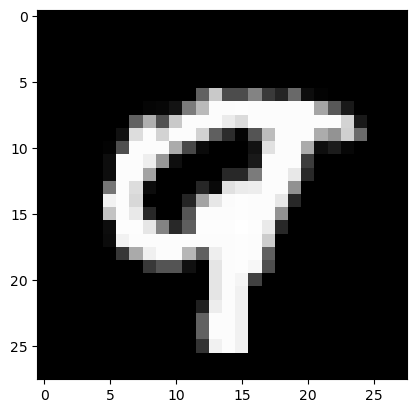

Numero 6 classificato come 5


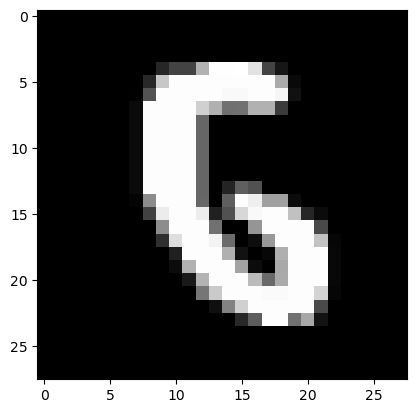

Numero 5 classificato come 6


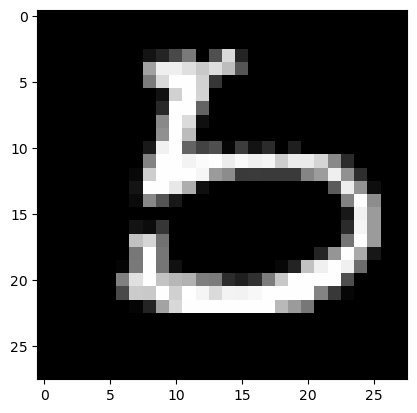

Numero 8 classificato come 4


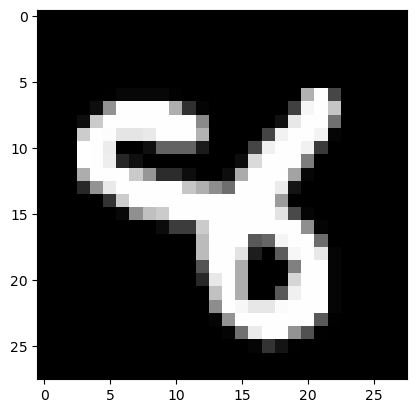

Numero 8 classificato come 9


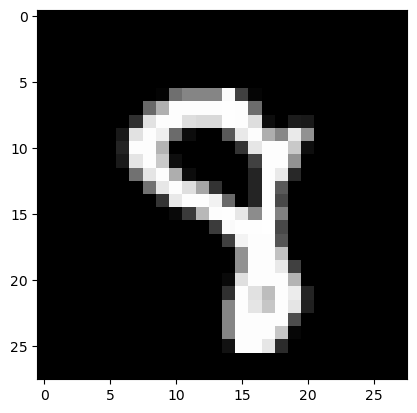

Numero 8 classificato come 3


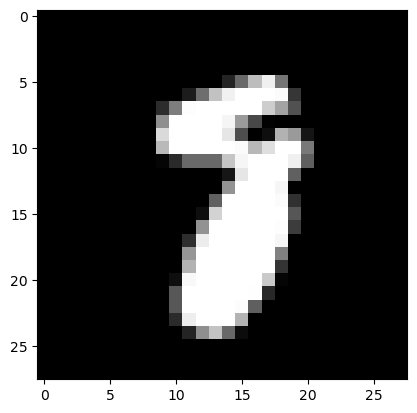

Numero 8 classificato come 3


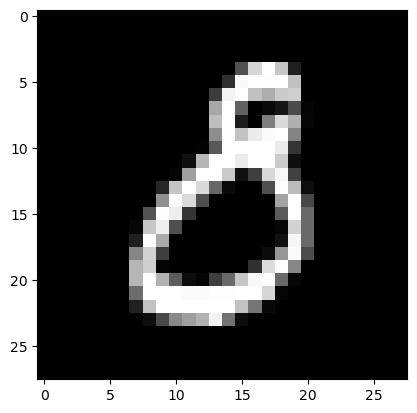

Numero 4 classificato come 9


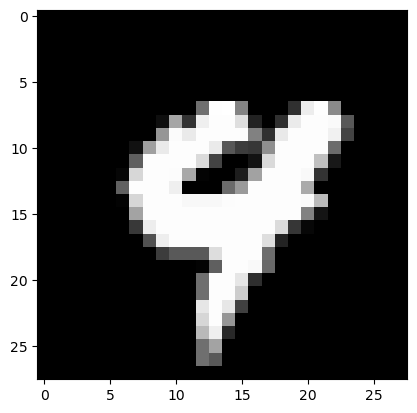

Numero 0 classificato come 8


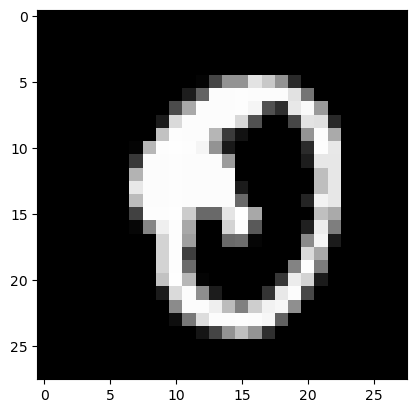

Numero 2 classificato come 8


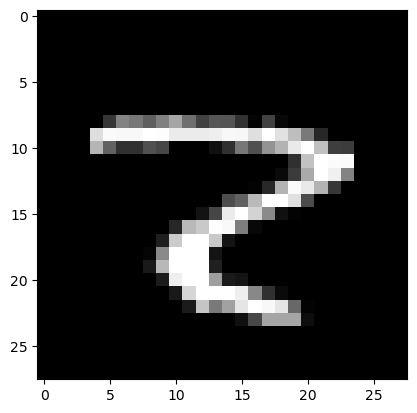

Numero 8 classificato come 4


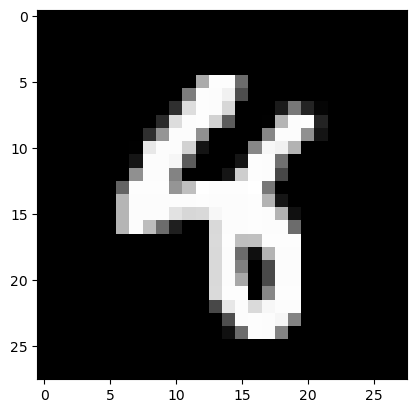

Numero 0 classificato come 3


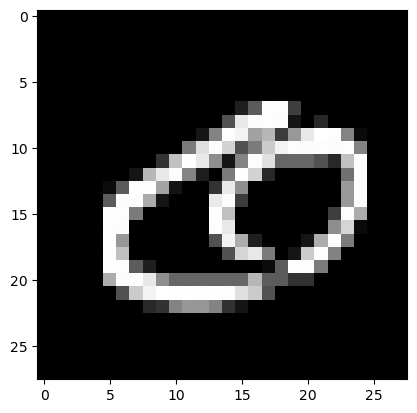

Numero 1 classificato come 6


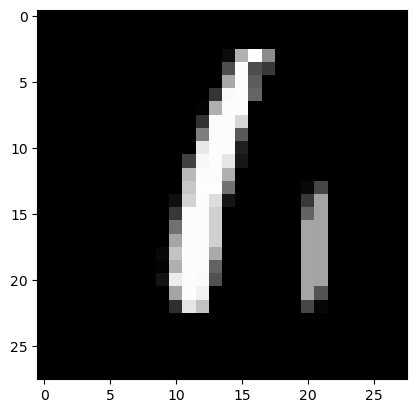

Numero 4 classificato come 6


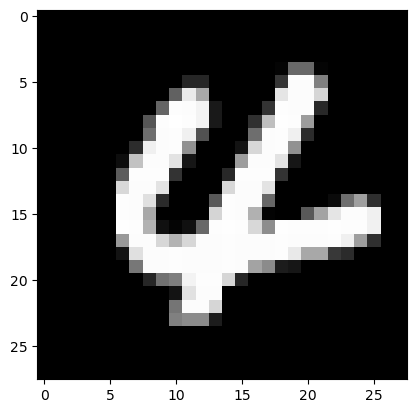

Numero 1 classificato come 8


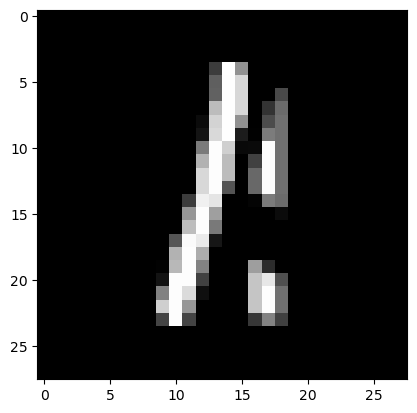

Numero 8 classificato come 9


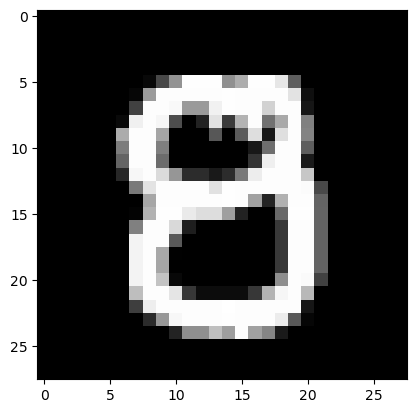

Numero 8 classificato come 9


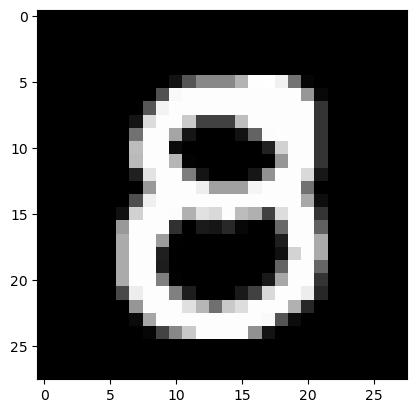

Numero 7 classificato come 9


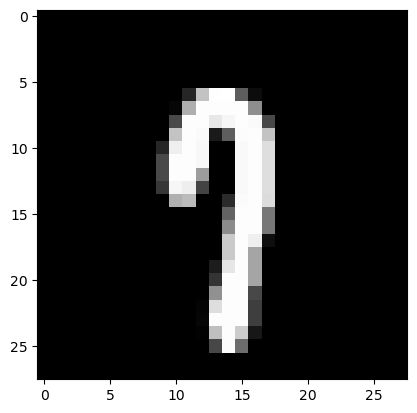

Numero 1 classificato come 8


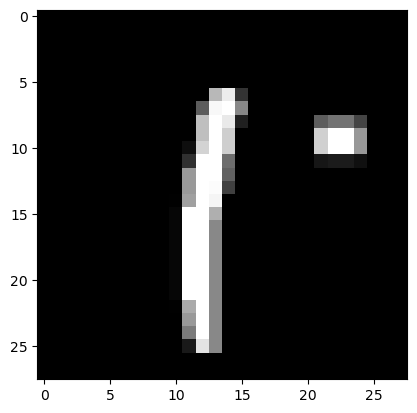

Numero 4 classificato come 3


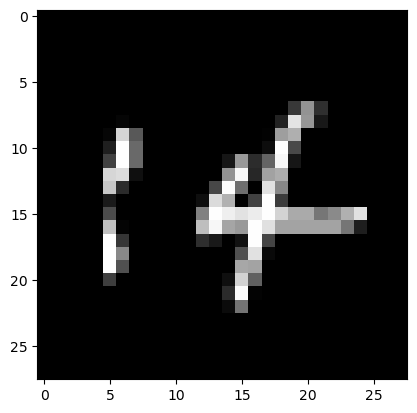

Numero 3 classificato come 7


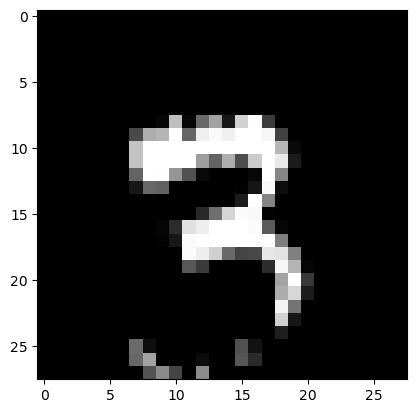

Numero 7 classificato come 9


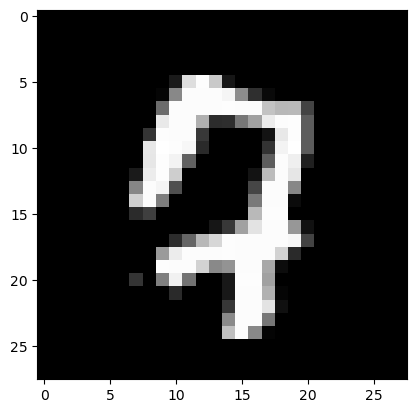

Numero 4 classificato come 9


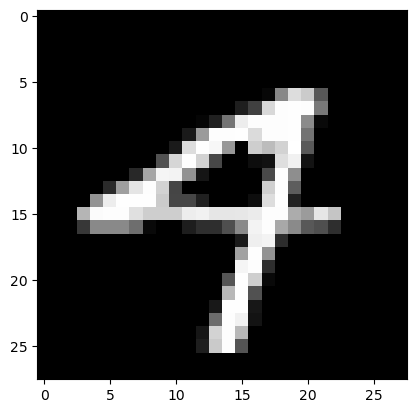

Numero 7 classificato come 9


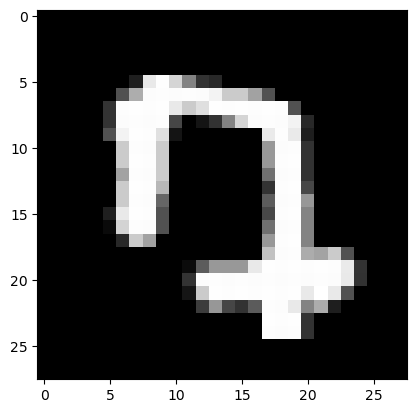

Numero 4 classificato come 9


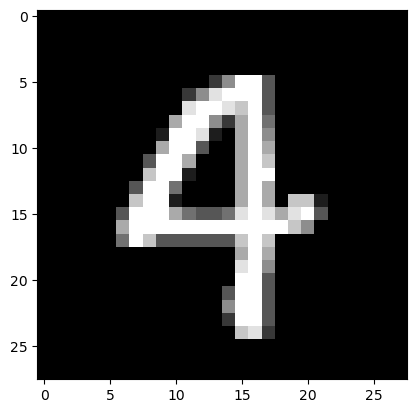

Numero 4 classificato come 9


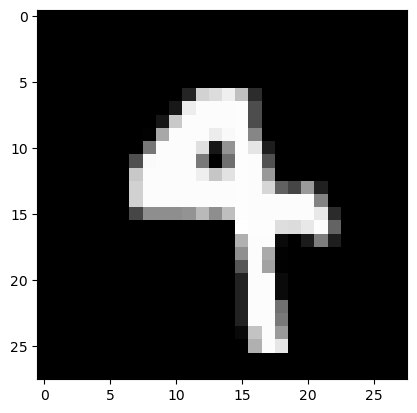

Numero 5 classificato come 3


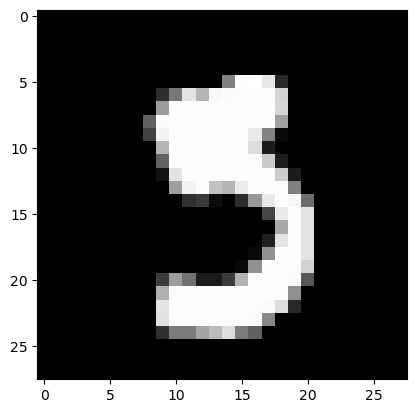

Numero 3 classificato come 9


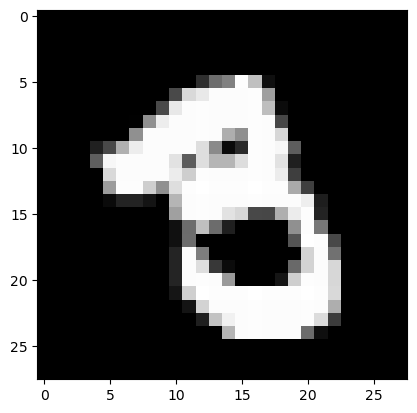

Numero 5 classificato come 3


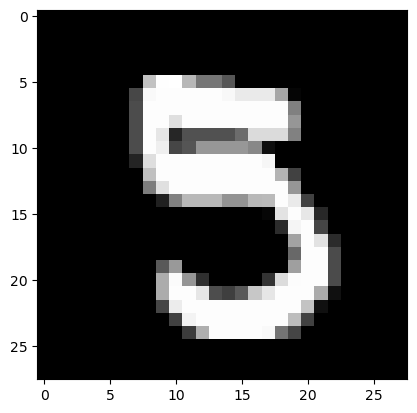

Numero 3 classificato come 9


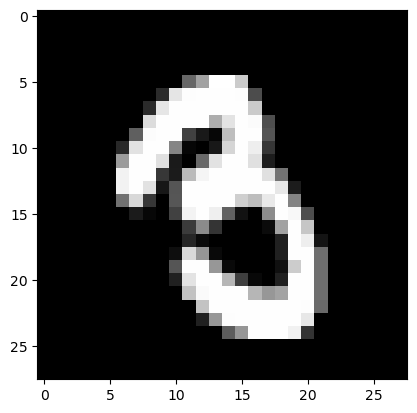

Numero 5 classificato come 9


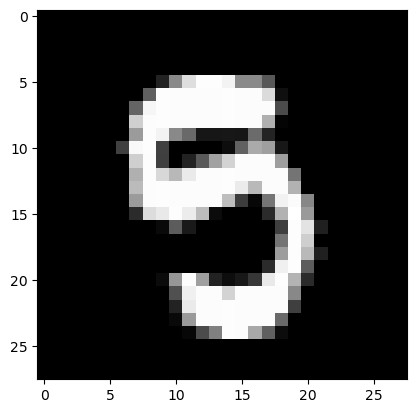

Numero 5 classificato come 3


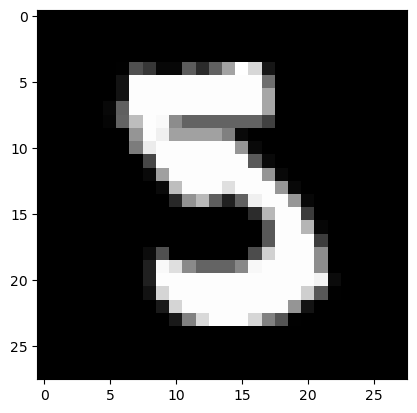

Numero 5 classificato come 9


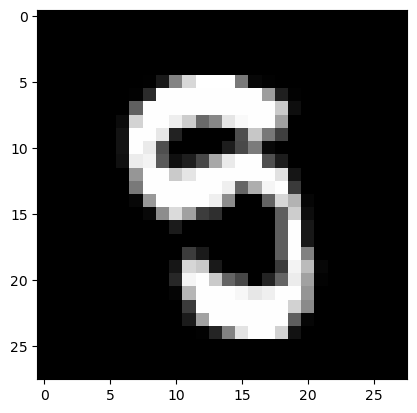

Numero 3 classificato come 9


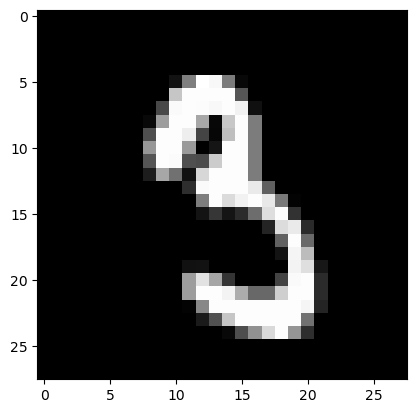

Numero 3 classificato come 9


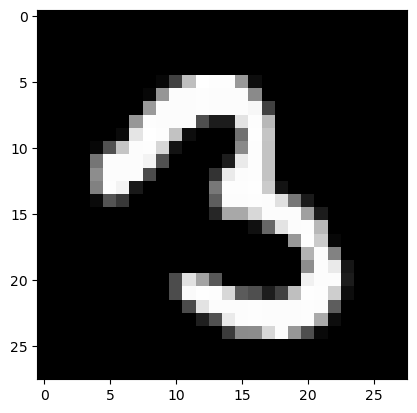

Numero 3 classificato come 8


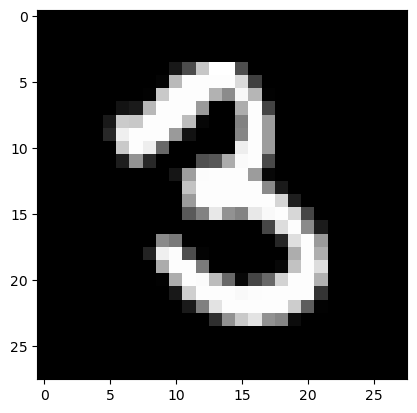

Numero 3 classificato come 9


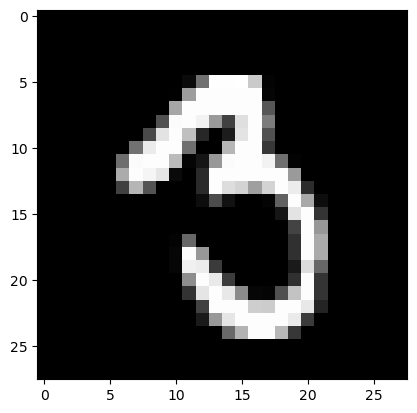

Numero 9 classificato come 3


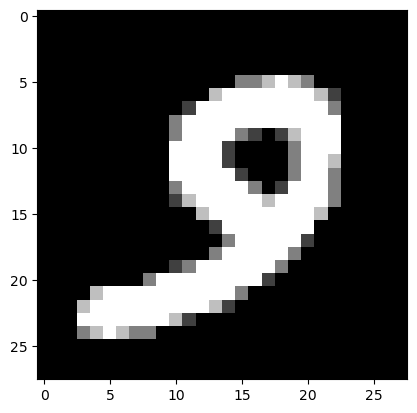

Numero 5 classificato come 8


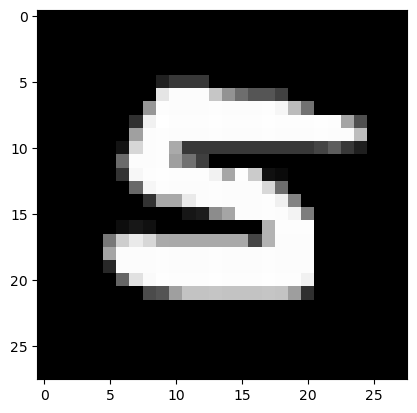

Numero 8 classificato come 9


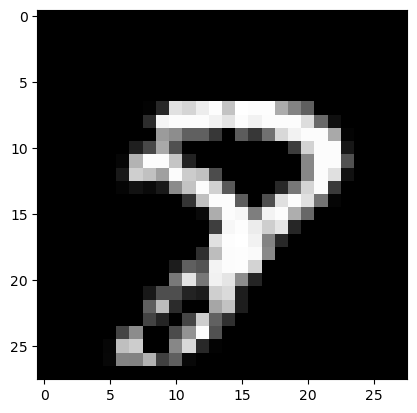

Numero 6 classificato come 2


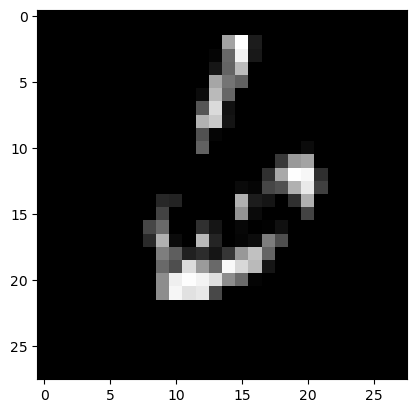

Numero 9 classificato come 7


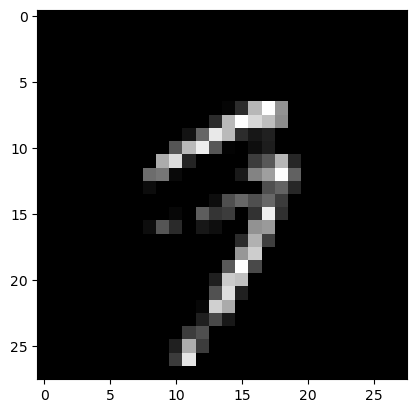

Numero 0 classificato come 7


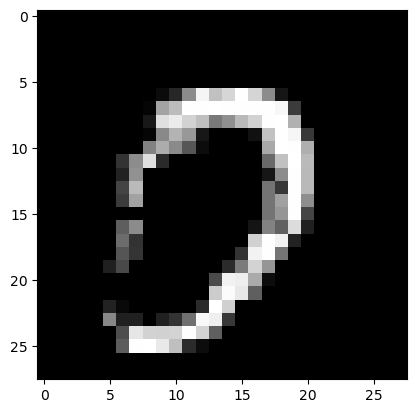

Numero 5 classificato come 3


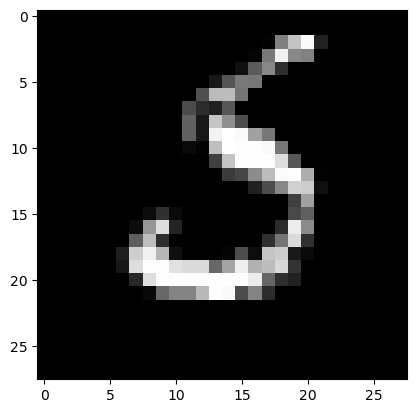

Numero 0 classificato come 5


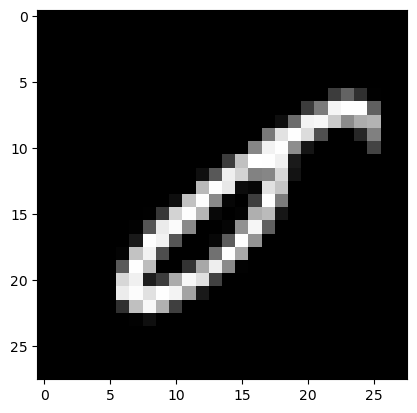

Numero 8 classificato come 5


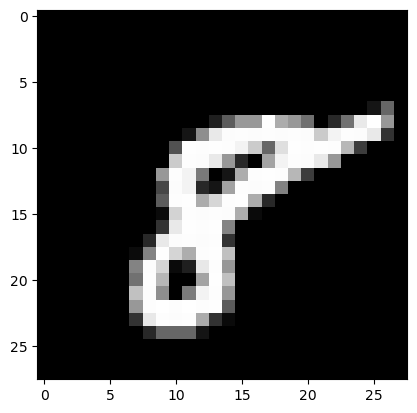

Numero 8 classificato come 9


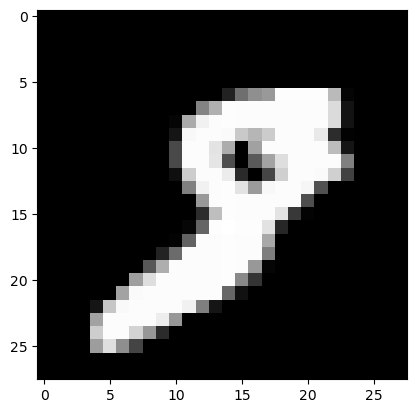

Numero 1 classificato come 6


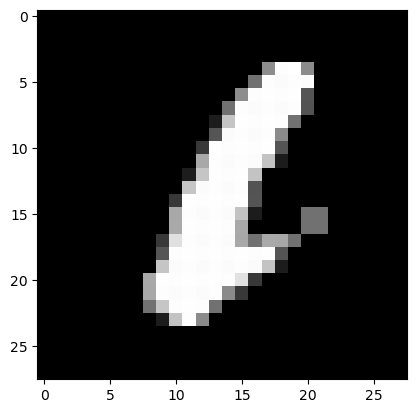

Numero 0 classificato come 3


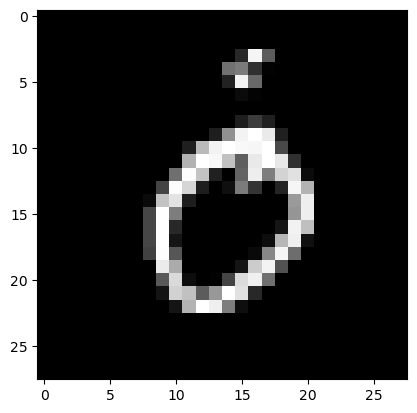

Numero 4 classificato come 8


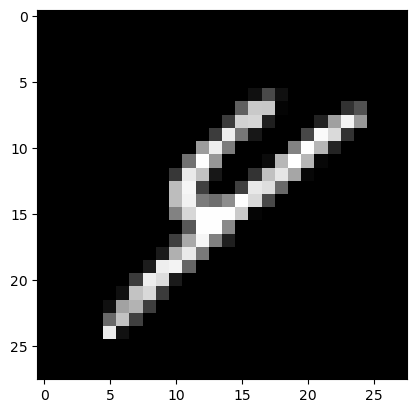

Numero 5 classificato come 6


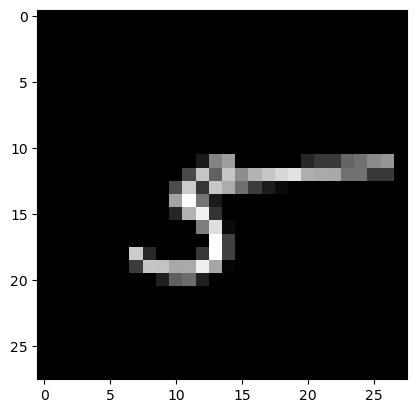

Numero 8 classificato come 9


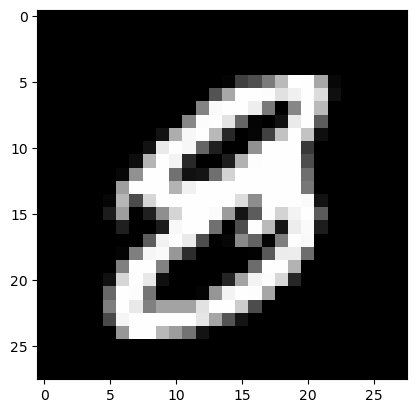

Numero 7 classificato come 9


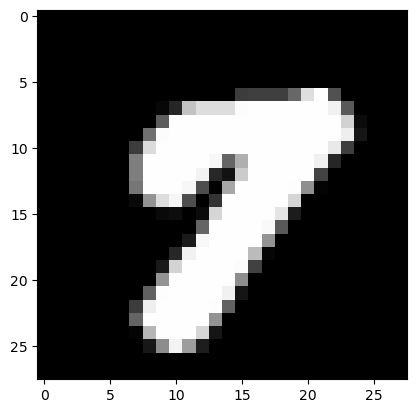

Numero 8 classificato come 6


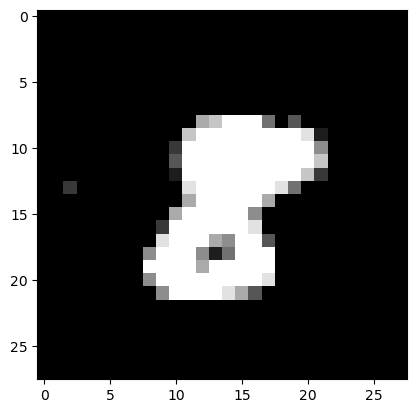

Numero 1 classificato come 8


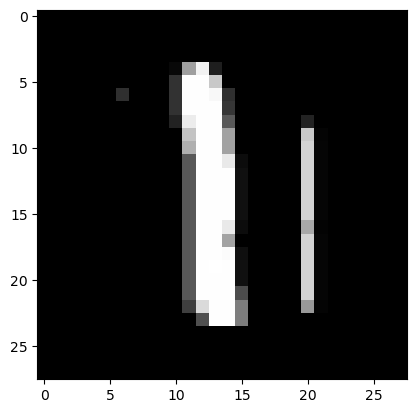

Numero 2 classificato come 8


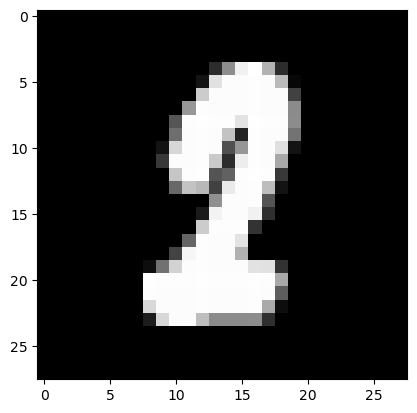

Numero 3 classificato come 9


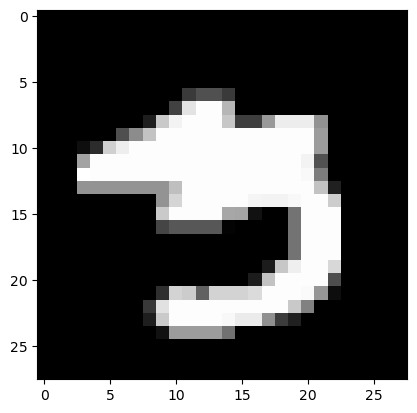

Numero 3 classificato come 9


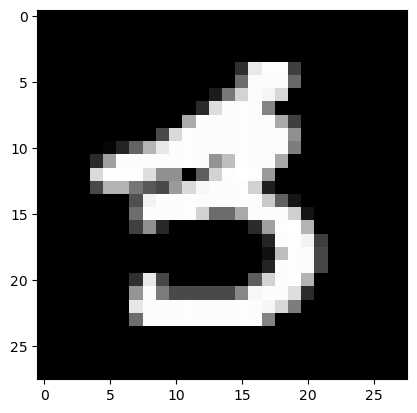

Numero 6 classificato come 4


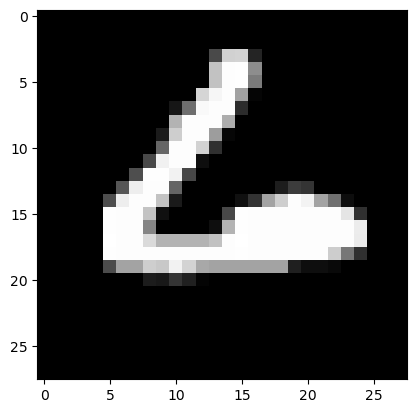

Numero 8 classificato come 6


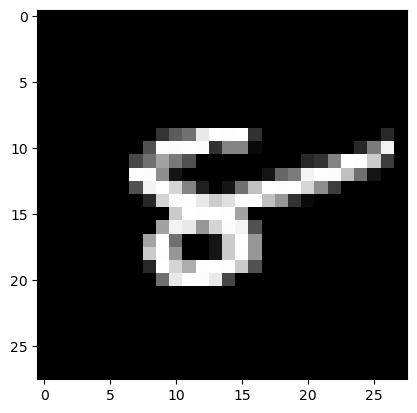

Numero 4 classificato come 9


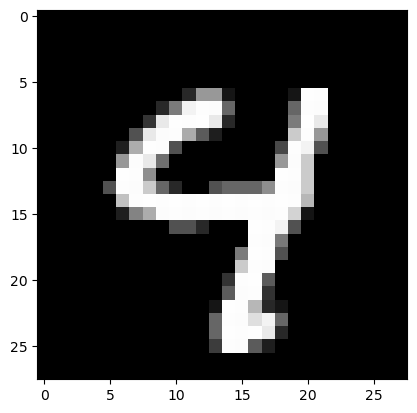

Numero 8 classificato come 6


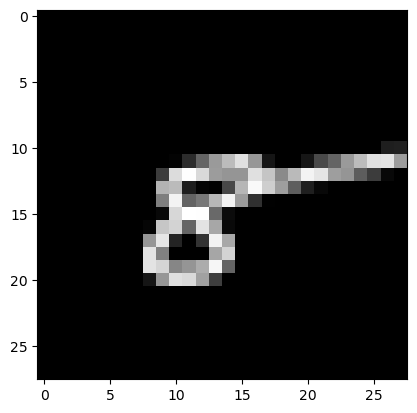

Numero 8 classificato come 0


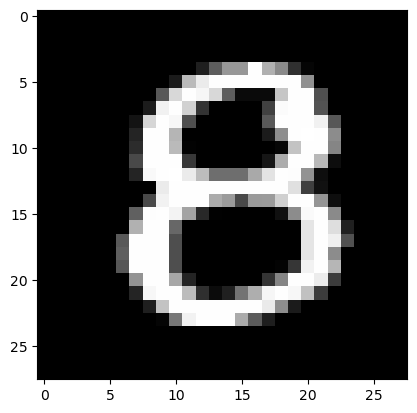

Numero 4 classificato come 9


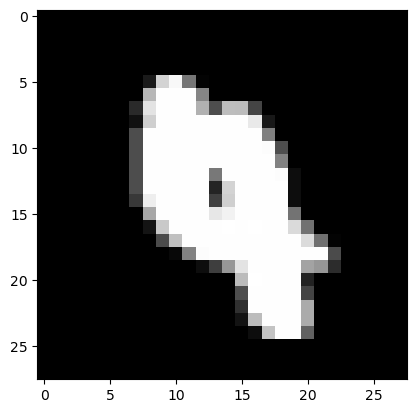

Numero 7 classificato come 2


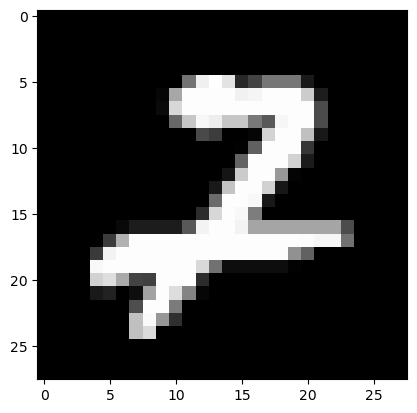

Numero 7 classificato come 2


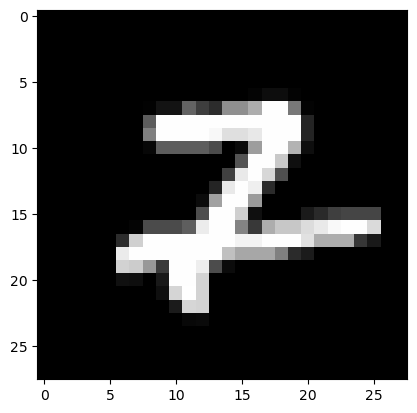

Numero 7 classificato come 2


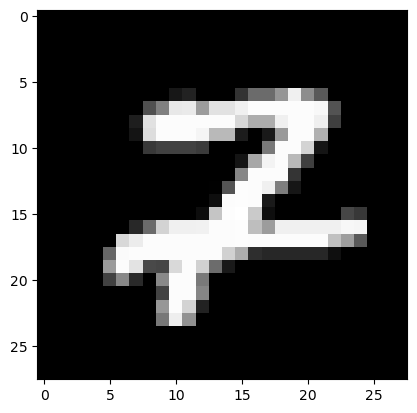

Numero 7 classificato come 2


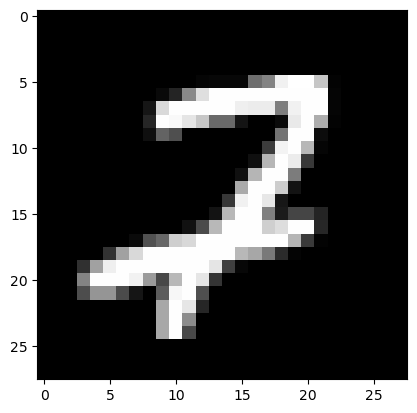

Numero 5 classificato come 3


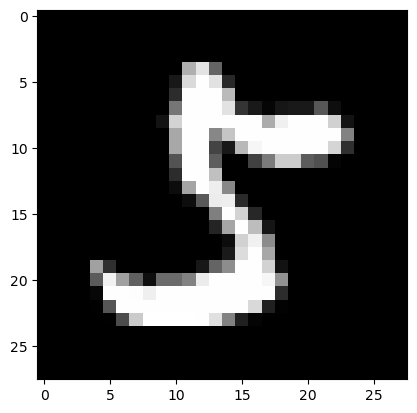

Numero 4 classificato come 9


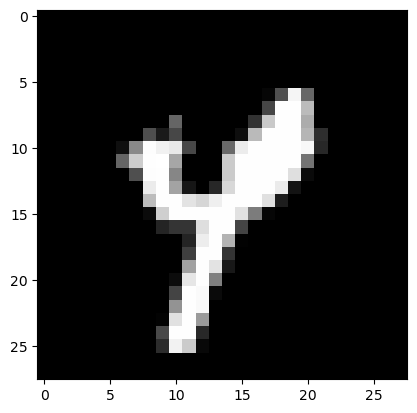

Numero 9 classificato come 4


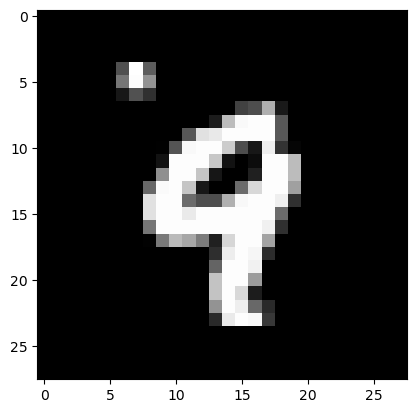

Numero 0 classificato come 8


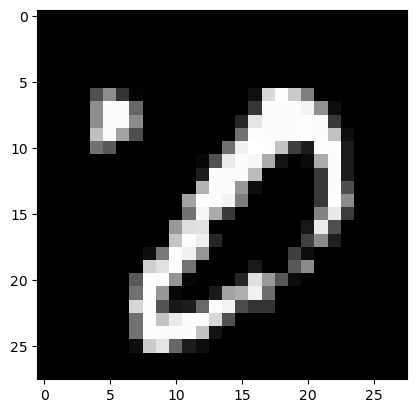

Numero 4 classificato come 7


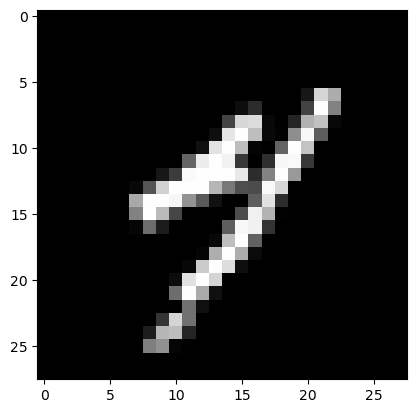

Numero 6 classificato come 3


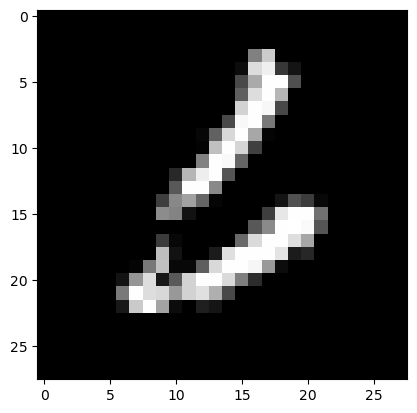

Numero 5 classificato come 6


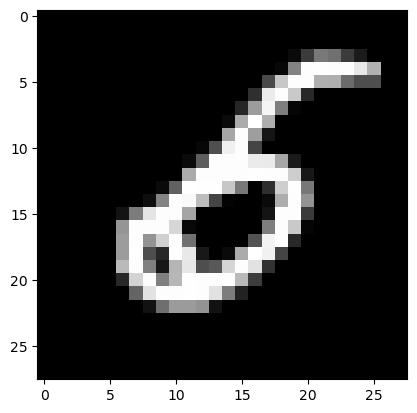

Numero 4 classificato come 0


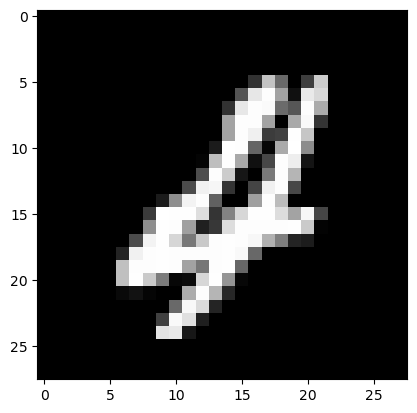

Numero 5 classificato come 6


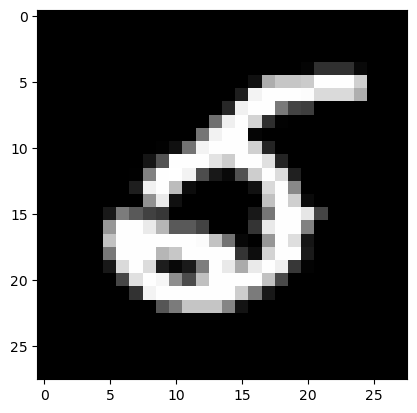

Numero 2 classificato come 0


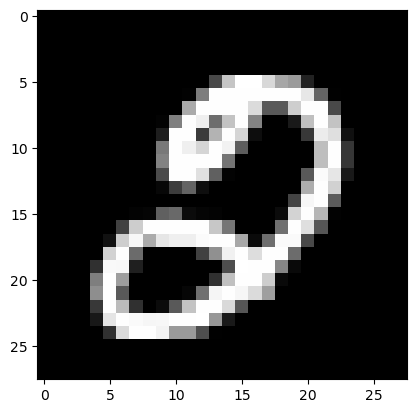

Numero 5 classificato come 0


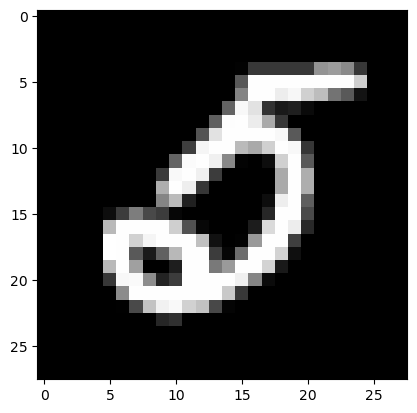

Numero 2 classificato come 0


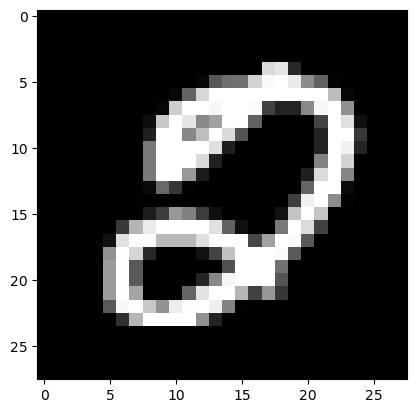

Numero 4 classificato come 9


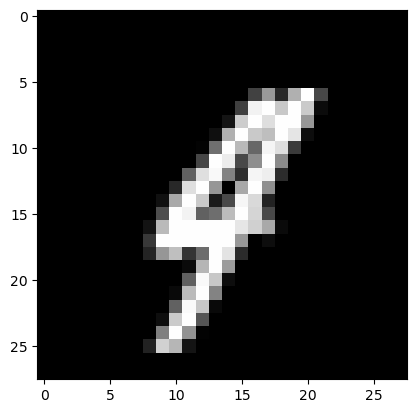

Numero 2 classificato come 3


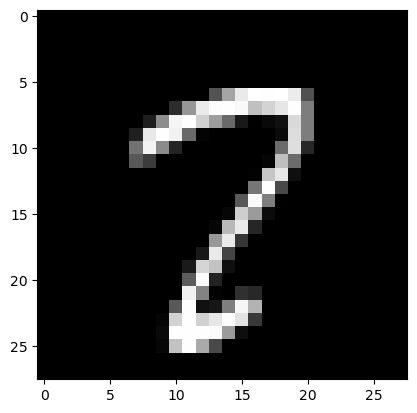

Numero 4 classificato come 9


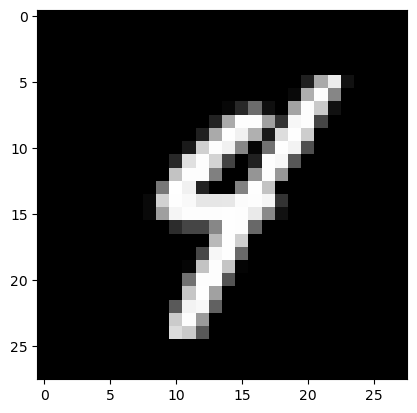

Numero 5 classificato come 8


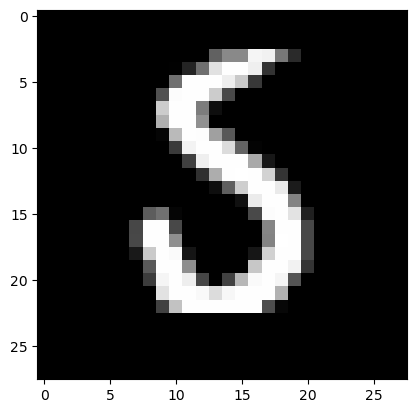

In [57]:
y_pred = np.argmax(model.predict(x_test), axis=1)       #ottenere predizioni multiclasse
for i in range(0, len(x_test)):
    if(y_pred[i] != y_test[i]):
        print('Numero %d classificato come %d' % (y_test[i], y_pred[i]))
        plt.imshow(x_test[i].reshape([28,28]), cmap='gray')
        plt.show()